In [149]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import seaborn as sns
import numpy as np

%matplotlib inline

from analysis import update_dict_from_log, update_dict_split_testname

# Fixed Radius Evaluation #

Load `df_summary`, which is the concatenation of all separate test dataframes in the `FixedRadius/dataframes` directory.

In [2]:
df_fixed = pickle.load(open('../FinalEvaluation/FixedRadius/dataframes/df_summary.pickle', 'rb'))
df_fixed.head()

testname  cluster  step  radius  \
0  mnist8x8_20p_retrain_vs_mnist8x8_20p_retrain_o...        0  0.05    6.80   
1  mnist8x8_20p_retrain_vs_mnist8x8_20p_retrain_o...        1  0.05    4.30   
2  mnist8x8_20p_retrain_vs_mnist8x8_20p_retrain_o...        2  0.05    3.85   
3  mnist8x8_20p_retrain_vs_mnist8x8_20p_retrain_o...        3  0.05    7.25   
4  mnist8x8_20p_retrain_vs_mnist8x8_20p_retrain_o...        4  0.05    5.70   

            obj         bound       time  \
0 -0.000000e+00 -0.000000e+00  48.481032   
1 -1.421085e-14 -1.421085e-14  41.640744   
2 -7.105427e-15 -7.105427e-15  36.557921   
3 -2.842171e-14 -2.842171e-14  53.780616   
4 -0.000000e+00 -0.000000e+00  42.152481   

                                             logfile  \
0  FinalEvaluation/mnist8x8_20p_retrain_vs_mnist8...   
1  FinalEvaluation/mnist8x8_20p_retrain_vs_mnist8...   
2  FinalEvaluation/mnist8x8_20p_retrain_vs_mnist8...   
3  FinalEvaluation/mnist8x8_20p_retrain_vs_mnist8...   
4  FinalEvaluation/mnist8x8_20p_retrain_vs_mnist8...   

                                           inputfile  
0  mnist8x8_20p_retrain_vs_mnist8x8_20p_retrain_o...  
1  mnist8x8_20p_retrain_vs_mnist8x8_20p_retrain_o...  
2  mnist8x8_20p_retrain_vs_mnist8x8_20p_retrain_o...  
3  mnist8x8_20p_retrain_vs_mnist8x8_20p_retrain_o...  
4  mnist8x8_20p_retrain_vs_mnist8x8_20p_retrain_o...

I have moved the logfiles and input files to a different directory, so I need to update the respective columns in the dataframe.

In [3]:
df_fixed['inputfile'] = 'FinalEvaluation/FixedRadius/inputs/' + df_fixed['inputfile'].astype(str)
df_fixed['logfile'] = df_fixed['logfile'].str.replace('FinalEvaluation', 'FinalEvaluation/FixedRadius/logs')
df_fixed.head()

testname  cluster  step  radius  \
0  mnist8x8_20p_retrain_vs_mnist8x8_20p_retrain_o...        0  0.05    6.80   
1  mnist8x8_20p_retrain_vs_mnist8x8_20p_retrain_o...        1  0.05    4.30   
2  mnist8x8_20p_retrain_vs_mnist8x8_20p_retrain_o...        2  0.05    3.85   
3  mnist8x8_20p_retrain_vs_mnist8x8_20p_retrain_o...        3  0.05    7.25   
4  mnist8x8_20p_retrain_vs_mnist8x8_20p_retrain_o...        4  0.05    5.70   

            obj         bound       time  \
0 -0.000000e+00 -0.000000e+00  48.481032   
1 -1.421085e-14 -1.421085e-14  41.640744   
2 -7.105427e-15 -7.105427e-15  36.557921   
3 -2.842171e-14 -2.842171e-14  53.780616   
4 -0.000000e+00 -0.000000e+00  42.152481   

                                             logfile  \
0  FinalEvaluation/FixedRadius/logs/mnist8x8_20p_...   
1  FinalEvaluation/FixedRadius/logs/mnist8x8_20p_...   
2  FinalEvaluation/FixedRadius/logs/mnist8x8_20p_...   
3  FinalEvaluation/FixedRadius/logs/mnist8x8_20p_...   
4  FinalEvaluation/FixedRadius/logs/mnist8x8_20p_...   

                                           inputfile  
0  FinalEvaluation/FixedRadius/inputs/mnist8x8_20...  
1  FinalEvaluation/FixedRadius/inputs/mnist8x8_20...  
2  FinalEvaluation/FixedRadius/inputs/mnist8x8_20...  
3  FinalEvaluation/FixedRadius/inputs/mnist8x8_20...  
4  FinalEvaluation/FixedRadius/inputs/mnist8x8_20...

Now load information about the structure of the optimization problem from the logfiles.

In [4]:
dict_list = df_fixed.to_dict('records')

for d in dict_list:
    d = update_dict_from_log(d, logfile='../' + d['logfile'])
    d = update_dict_split_testname(d)
    
df_fixed = pd.DataFrame(dict_list)

In [5]:
df_fixed.head()

testname  cluster  step  radius  \
0  mnist8x8_20p_retrain_vs_mnist8x8_20p_retrain_o...        0  0.05    6.80   
1  mnist8x8_20p_retrain_vs_mnist8x8_20p_retrain_o...        1  0.05    4.30   
2  mnist8x8_20p_retrain_vs_mnist8x8_20p_retrain_o...        2  0.05    3.85   
3  mnist8x8_20p_retrain_vs_mnist8x8_20p_retrain_o...        3  0.05    7.25   
4  mnist8x8_20p_retrain_vs_mnist8x8_20p_retrain_o...        4  0.05    5.70   

            obj         bound       time  \
0 -0.000000e+00 -0.000000e+00  48.481032   
1 -1.421085e-14 -1.421085e-14  41.640744   
2 -7.105427e-15 -7.105427e-15  36.557921   
3 -2.842171e-14 -2.842171e-14  53.780616   
4 -0.000000e+00 -0.000000e+00  42.152481   

                                             logfile  \
0  FinalEvaluation/FixedRadius/logs/mnist8x8_20p_...   
1  FinalEvaluation/FixedRadius/logs/mnist8x8_20p_...   
2  FinalEvaluation/FixedRadius/logs/mnist8x8_20p_...   
3  FinalEvaluation/FixedRadius/logs/mnist8x8_20p_...   
4  FinalEvaluation/FixedRadius/logs/mnist8x8_20p_...   

                                           inputfile  raw_continuous  ...  \
0  FinalEvaluation/FixedRadius/inputs/mnist8x8_20...             374  ...   
1  FinalEvaluation/FixedRadius/inputs/mnist8x8_20...             374  ...   
2  FinalEvaluation/FixedRadius/inputs/mnist8x8_20...             374  ...   
3  FinalEvaluation/FixedRadius/inputs/mnist8x8_20...             374  ...   
4  FinalEvaluation/FixedRadius/inputs/mnist8x8_20...             374  ...   

   rows  columns  nonzeros  continuous  integer  binary  grbTime  \
0   762      467      4599         314      153     153    10.96   
1   722      447      4455         304      143     143     5.40   
2   697      434      4293         297      137     137     3.22   
3   754      463      4579         312      151     151    15.55   
4   758      465      4589         313      152     152     4.78   

                    nn1                   nn2 top_k  
0  mnist8x8_20p_retrain  mnist8x8_20p_retrain     1  
1  mnist8x8_20p_retrain  mnist8x8_20p_retrain     1  
2  mnist8x8_20p_retrain  mnist8x8_20p_retrain     1  
3  mnist8x8_20p_retrain  mnist8x8_20p_retrain     1  
4  mnist8x8_20p_retrain  mnist8x8_20p_retrain     1  

[5 rows x 22 columns]

Look at correlation between numerical features contained in the dataframe.

In [6]:
# grbTime and time are >0.99 correlated, all integer variables in our models are binary, so those columns are redundant
corr = df_fixed.drop(['grbTime', 'binary', 'raw_binary'], axis=1).corr()
corr.style.background_gradient(cmap='coolwarm')

In [7]:
df_plot = df_fixed.drop(['grbTime', 'binary', 'raw_binary'], axis=1)
df_plot.columns

Index(['testname', 'cluster', 'step', 'radius', 'obj', 'bound', 'time',
       'logfile', 'inputfile', 'raw_continuous', 'raw_integer', 'rows',
       'columns', 'nonzeros', 'continuous', 'integer', 'nn1', 'nn2', 'top_k'],
      dtype='object')

Look at full pairwise distribution of variables, since correlation numbers might hide interesting facts.

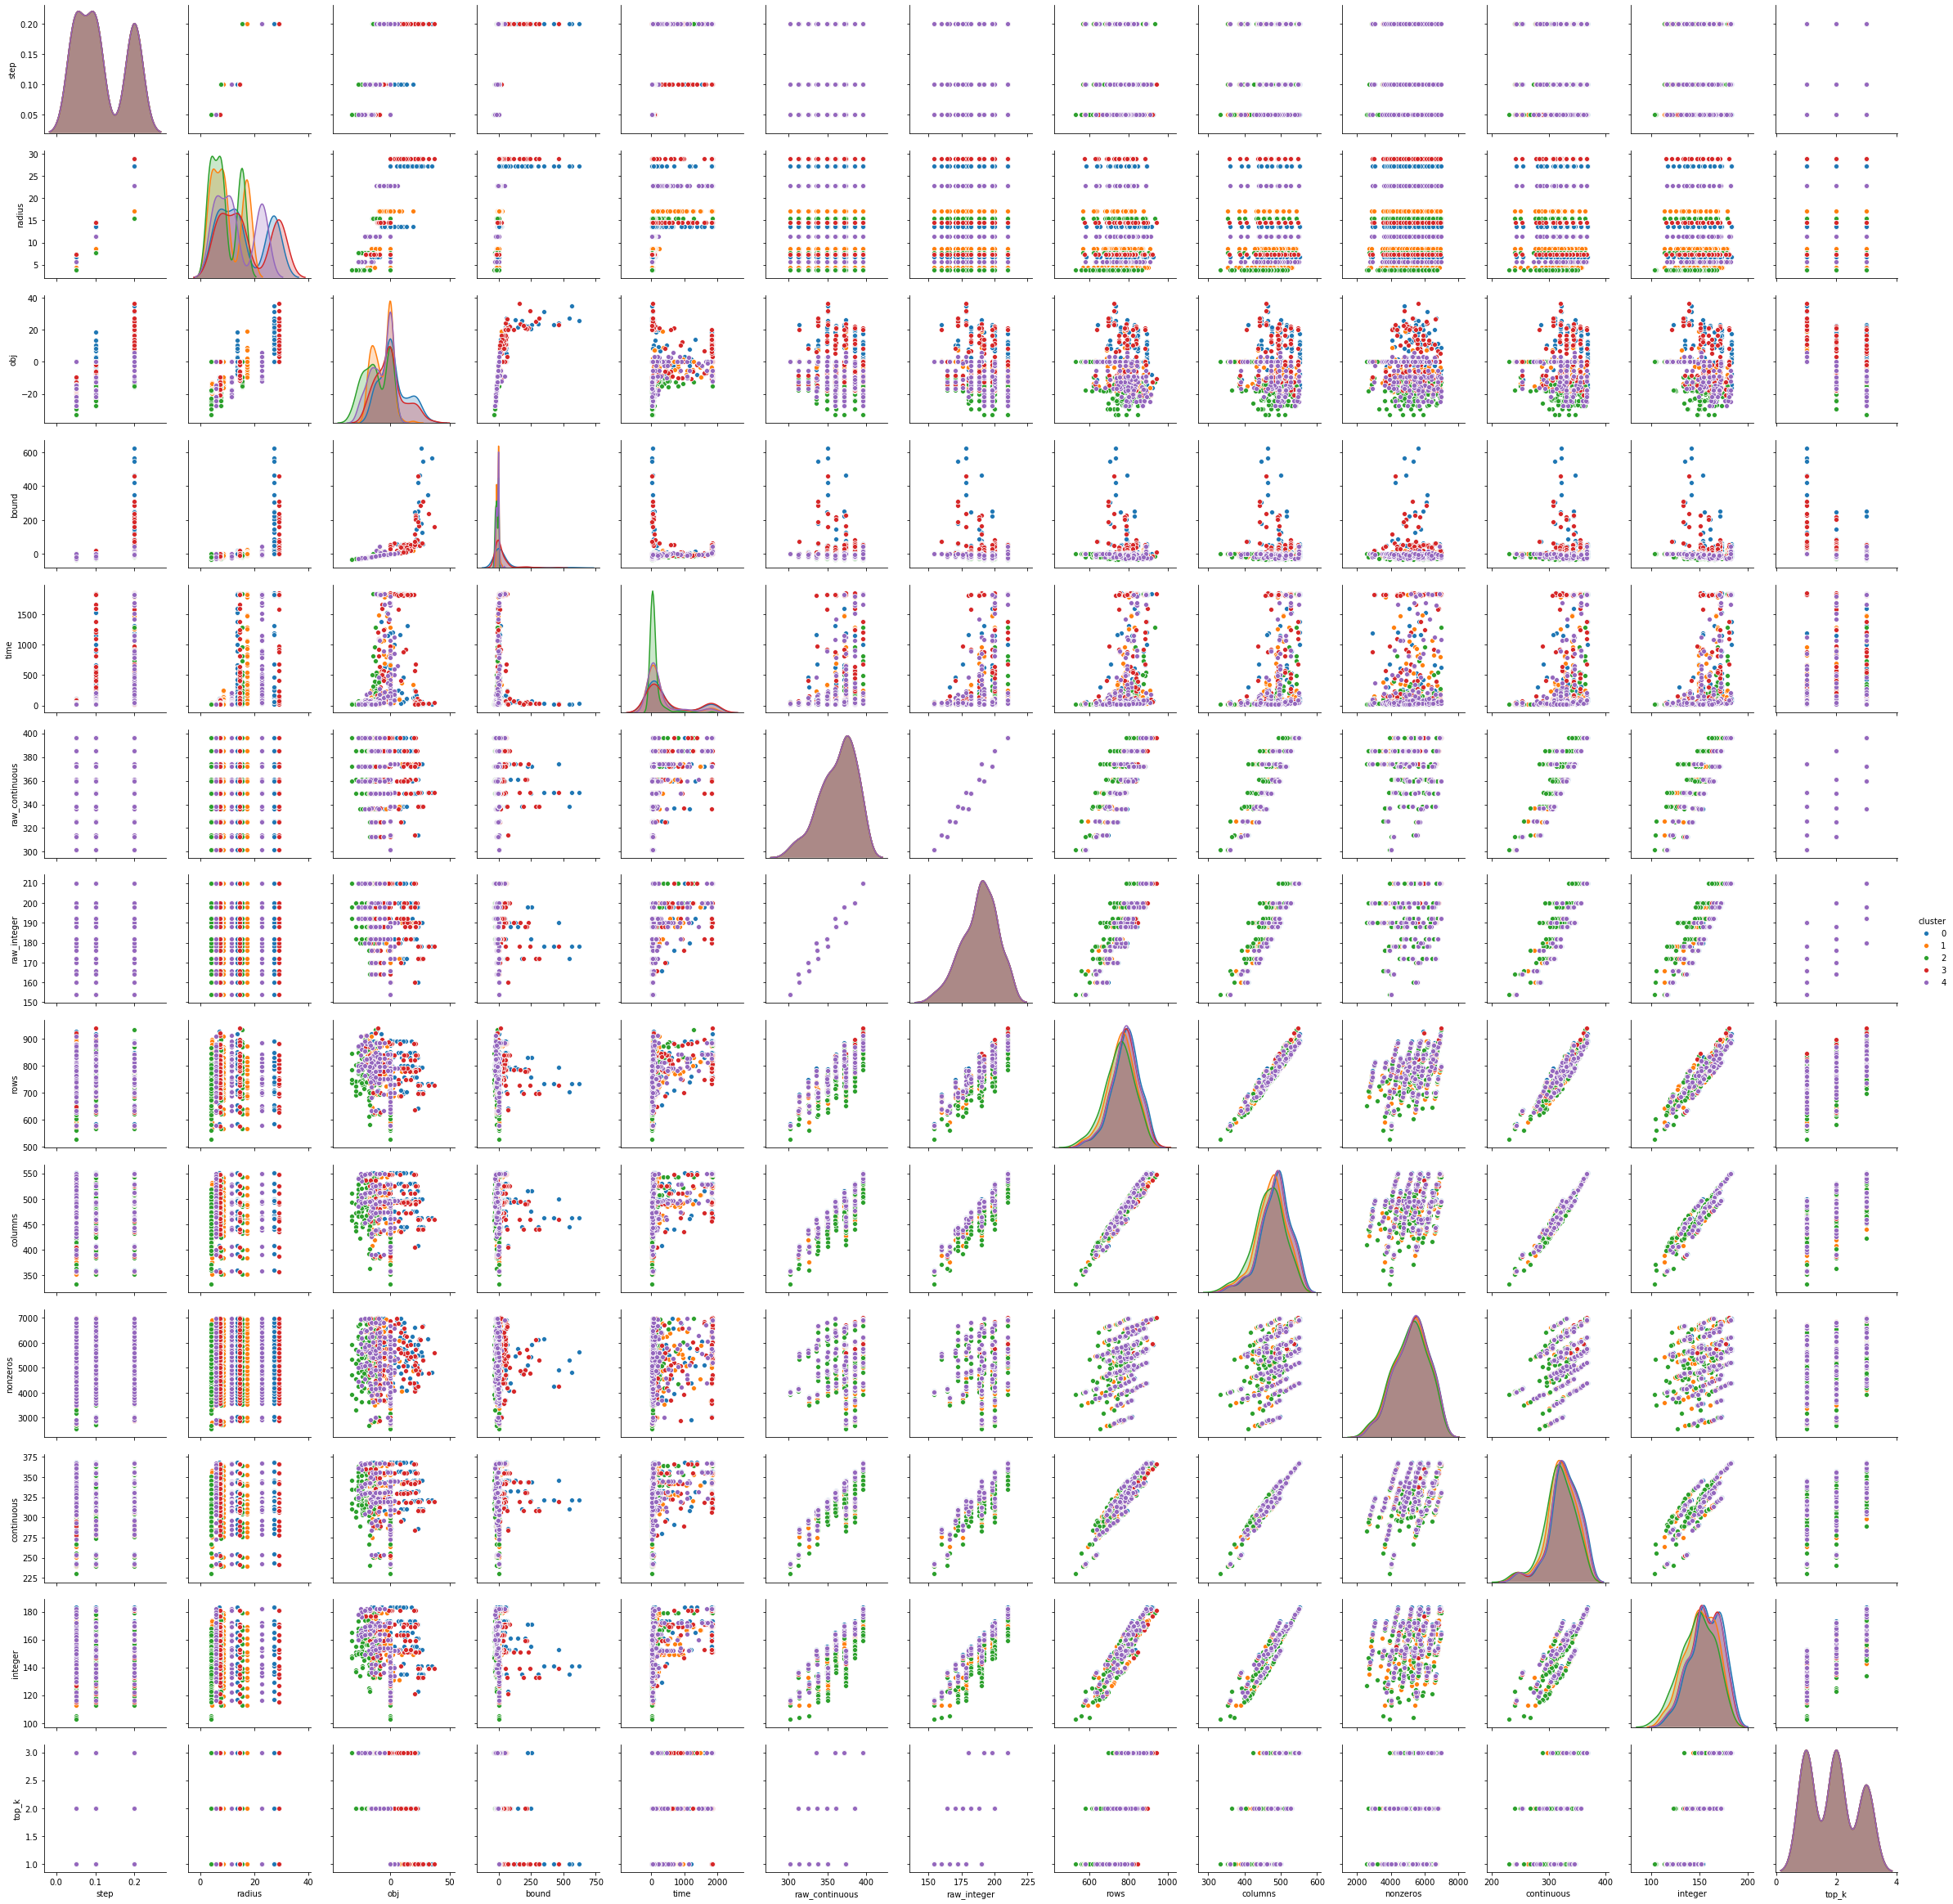

In [9]:
sns.pairplot(df_plot, vars=['step', 'radius', 'obj', 'bound', 'time', 'raw_continuous', 'raw_integer', 
                            'rows', 'columns', 'nonzeros', 'continuous', 'integer', 'top_k'], hue='cluster')

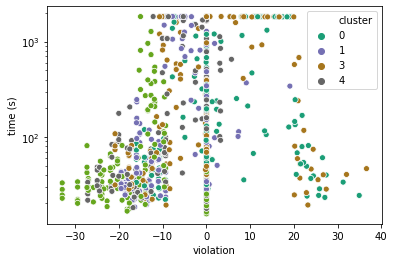

In [211]:
obj_t = sns.scatterplot(data=df_plot, x='obj', y='time', hue='cluster', palette='Dark2')
obj_t.set(ylabel='time (s)', xlabel='violation', yscale='log')
plt.savefig('obj_vs_time.pdf', bbox_inches='tight')

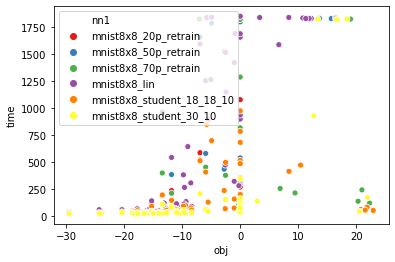

In [224]:
sns.scatterplot(data=df_plot[df_plot['top_k'] == 2], x='obj', y='time', hue='nn1', palette='Set1')

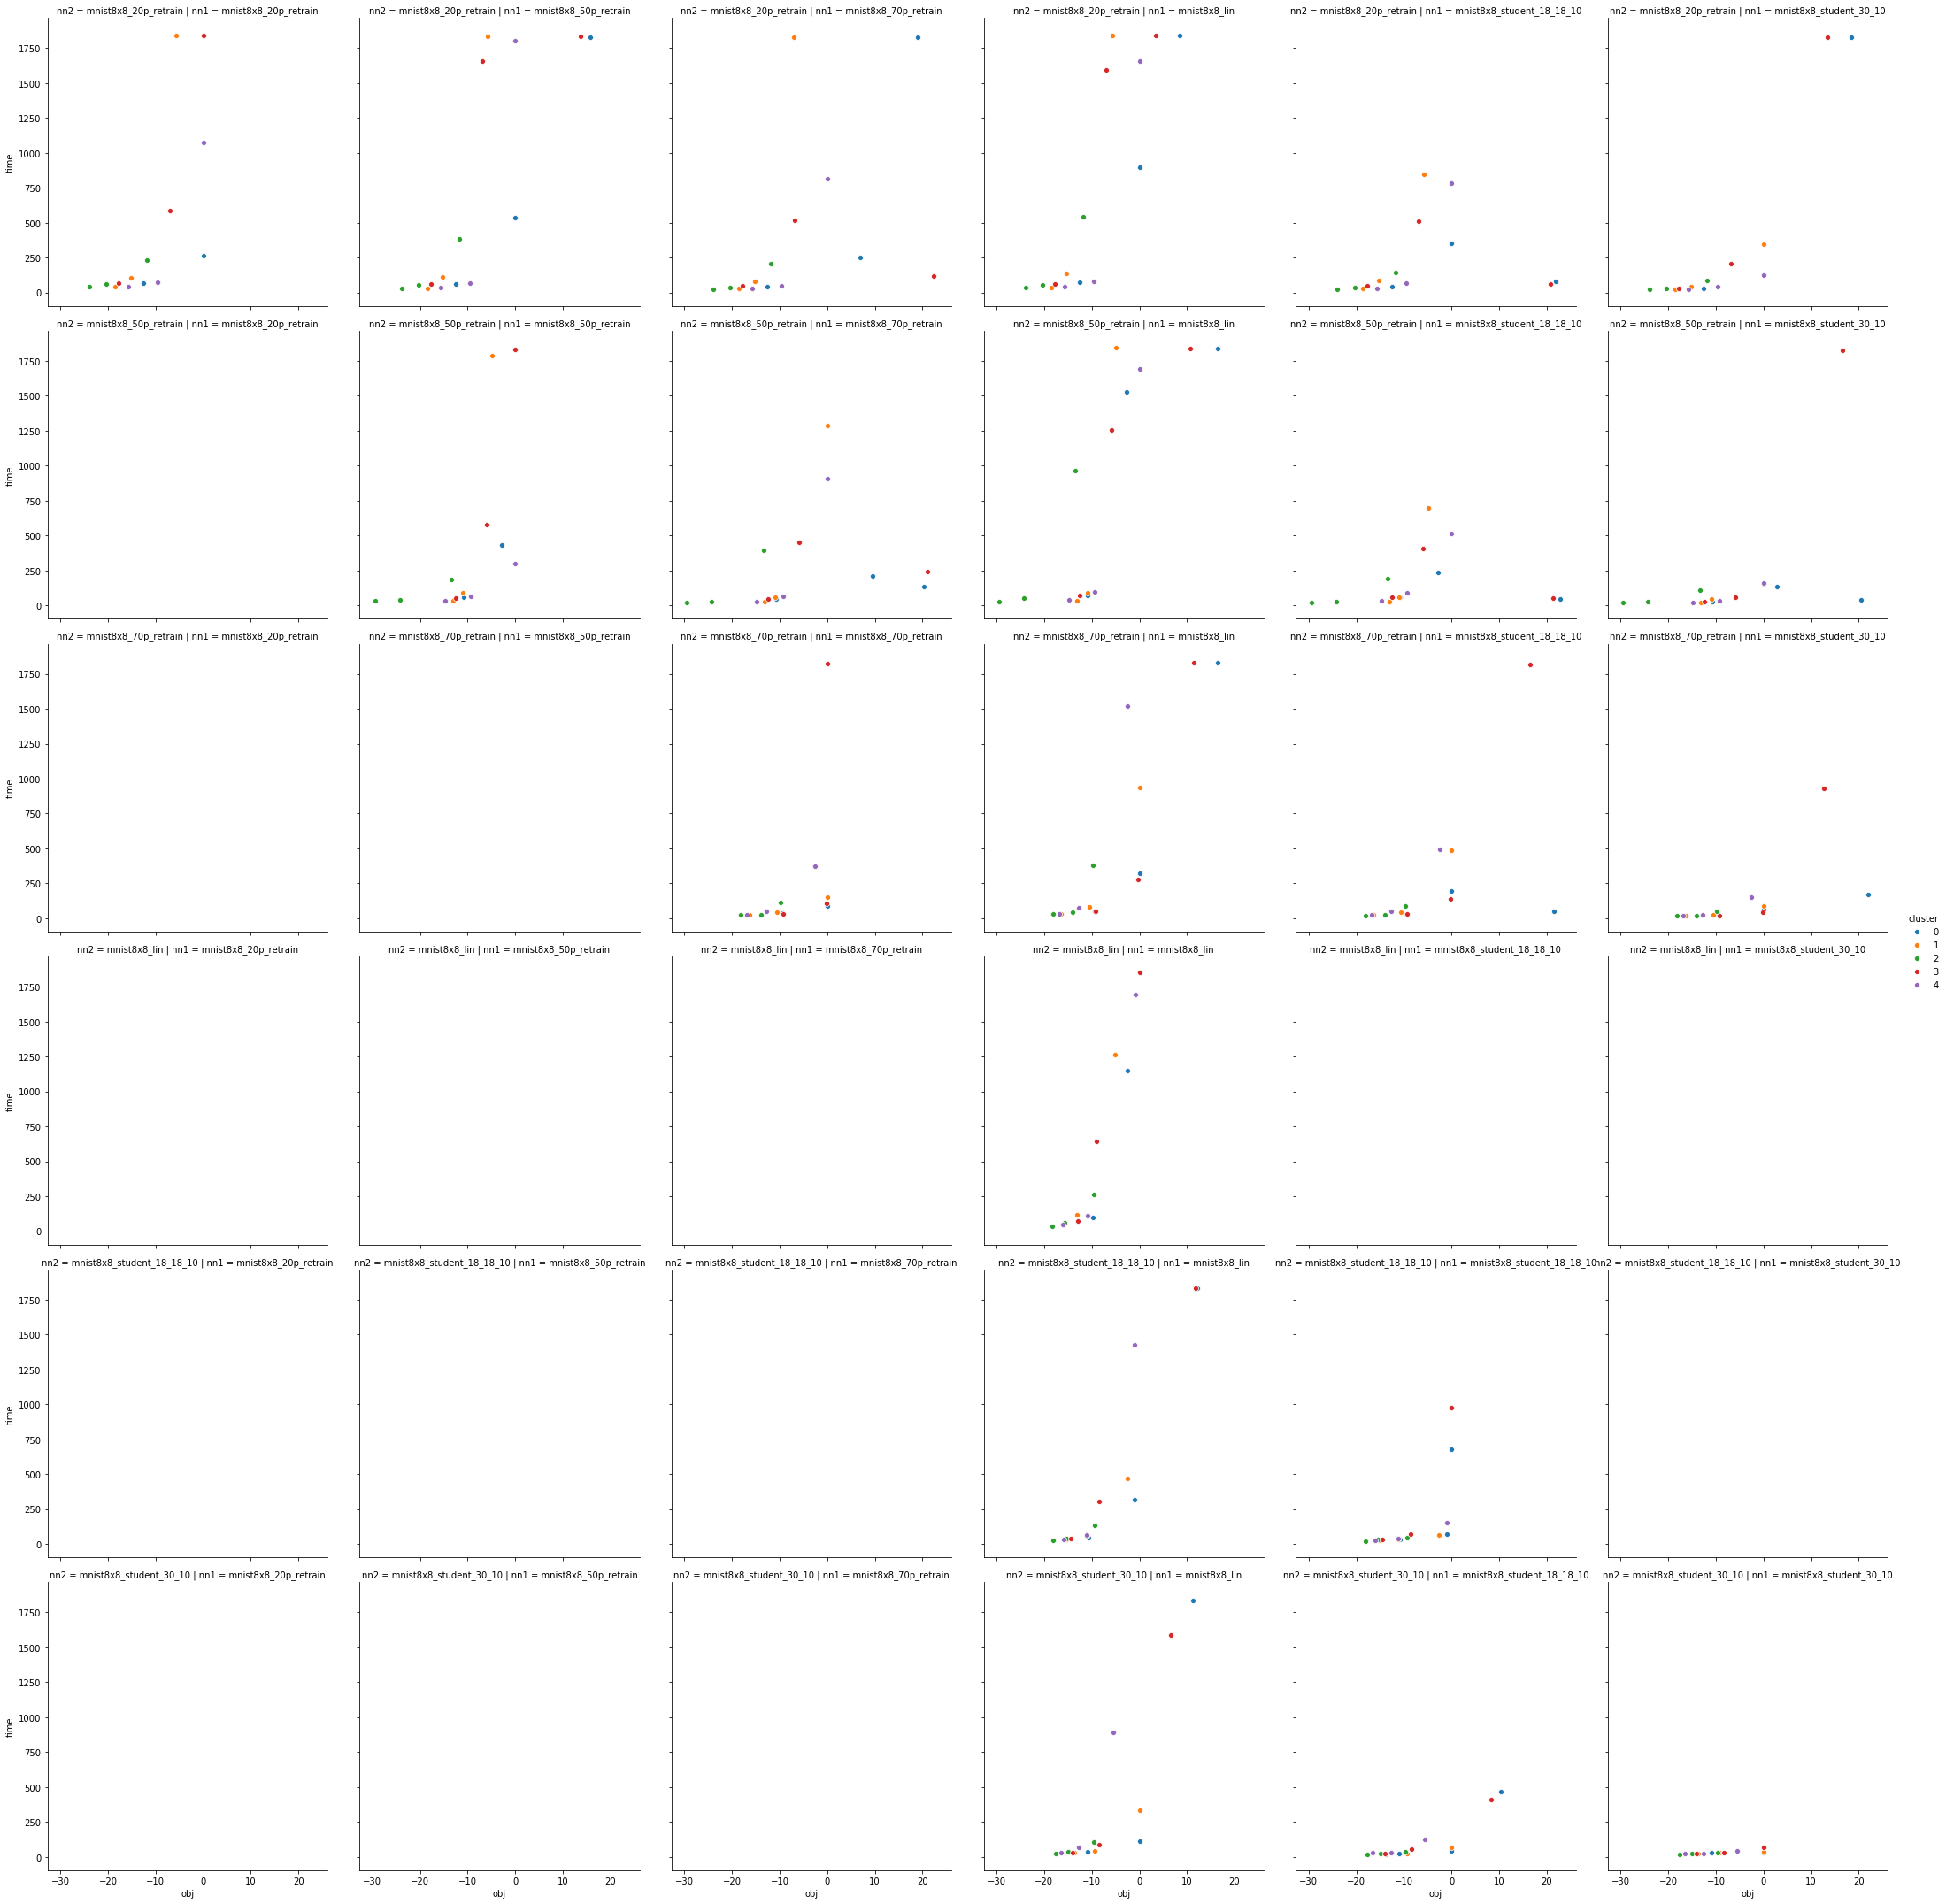

In [227]:
g = sns.FacetGrid(df_plot[(df_plot['top_k'] == 2)], col='nn1', row='nn2', hue='cluster', height=5)
g.map(sns.scatterplot, 'obj', 'time')
#g._legend_data.update({'step 0.05' : 'v'})
g.add_legend();

#g._legend.set_title('Compared Networks')

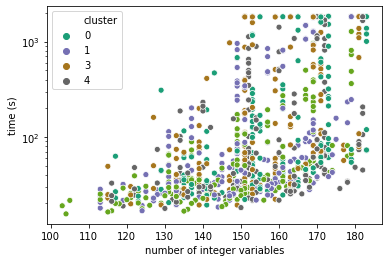

In [209]:
int_t = sns.scatterplot(data=df_plot, x='integer', y='time', hue='cluster', palette='Dark2')
int_t.set(ylabel='time (s)', xlabel='number of integer variables', yscale='log')
plt.savefig('int_vs_time.pdf', bbox_inches='tight')

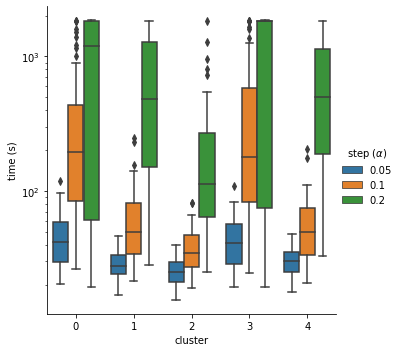

In [182]:
time_cluster = sns.catplot('cluster', 'time', 'step', data=df_plot, kind='box').set(yscale='log', ylabel='time (s)')
time_cluster._legend.set_title(r'step ($\alpha$)')
time_cluster.savefig('cluster_vs_time.pdf', bbox_inches='tight')

In [183]:
df_plot[(df_plot['cluster'] == 3) & (df_plot['step'] == 0.2)].describe()

cluster          step  radius           obj       bound         time  \
count     57.0  5.700000e+01    57.0  5.700000e+01   57.000000    57.000000   
mean       3.0  2.000000e-01    29.0  1.223765e+01   75.528687  1108.374057   
std        0.0  2.800230e-17     0.0  9.971017e+00   90.121154   822.044495   
min        3.0  2.000000e-01    29.0 -2.842171e-14   -0.000000    19.258929   
25%        3.0  2.000000e-01    29.0  5.531549e-04   27.443986    74.213574   
50%        3.0  2.000000e-01    29.0  1.187411e+01   50.135224  1821.324559   
75%        3.0  2.000000e-01    29.0  2.081582e+01   64.004701  1833.647725   
max        3.0  2.000000e-01    29.0  3.660710e+01  461.049140  1853.016238   

       raw_continuous  raw_integer        rows     columns     nonzeros  \
count       57.000000    57.000000   57.000000   57.000000    57.000000   
mean       363.842105   188.947368  774.614035  483.929825  5256.684211   
std         23.037074    13.293958   67.910591   41.037378   981.321615   
min        302.000000   154.000000  576.000000  357.000000  2887.000000   
25%        349.000000   180.000000  732.000000  459.000000  4579.000000   
50%        372.000000   190.000000  786.000000  493.000000  5387.000000   
75%        385.000000   200.000000  822.000000  511.000000  5915.000000   
max        396.000000   210.000000  882.000000  547.000000  6963.000000   

       continuous     integer      top_k  
count   57.000000   57.000000  57.000000  
mean   327.666667  156.263158   1.894737  
std     26.477304   16.356002   0.794719  
min    242.000000  115.000000   1.000000  
25%    312.000000  151.000000   1.000000  
50%    330.000000  153.000000   2.000000  
75%    344.000000  171.000000   3.000000  
max    366.000000  181.000000   3.000000

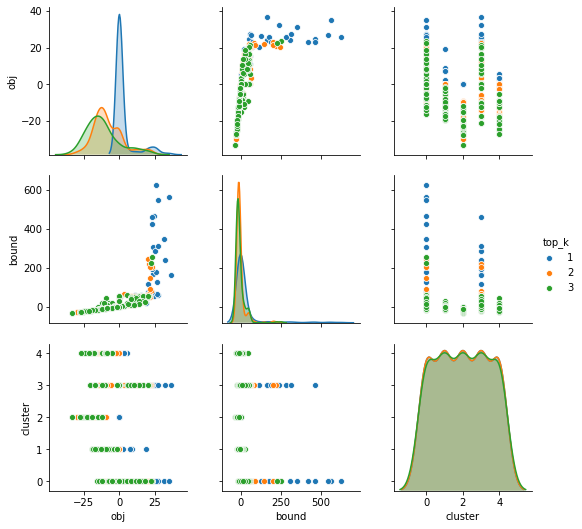

In [12]:
sns.pairplot(df_plot, vars=['obj', 'bound', 'cluster'], hue='top_k')

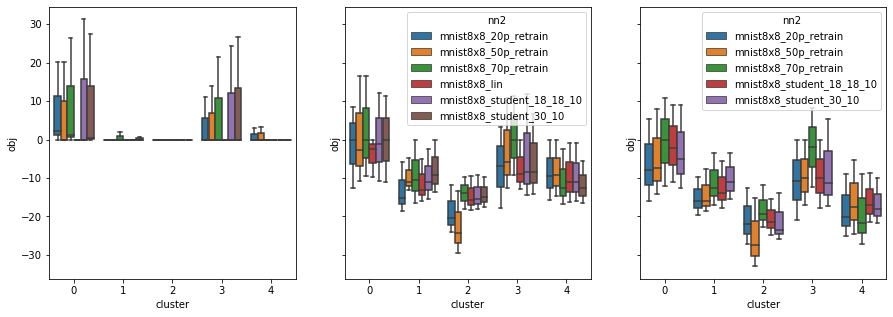

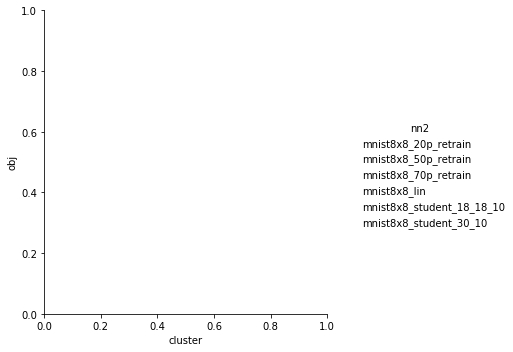

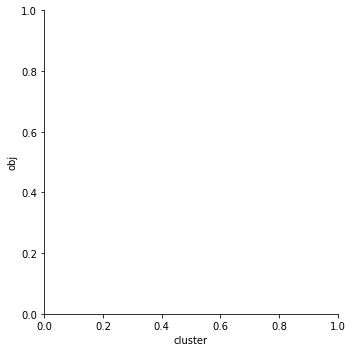

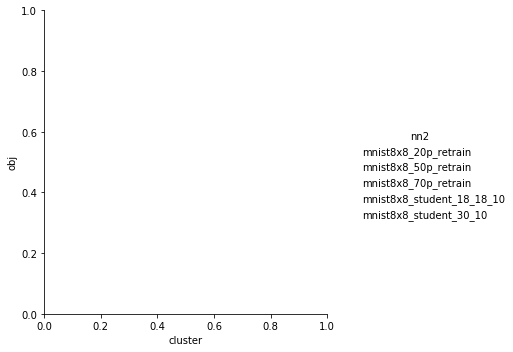

In [29]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(15,5))

sns.catplot('cluster', 'obj', 'nn2', data=df_plot[(df_plot['nn1'] == 'mnist8x8_lin') & (df_plot['top_k'] == 1)], 
            kind='box', ax=ax1)
ax1.legend_.remove()
sns.catplot('cluster', 'obj', 'nn2', data=df_plot[(df_plot['nn1'] == 'mnist8x8_lin') & (df_plot['top_k'] == 2)], 
            kind='box', legend=False, ax=ax2)
sns.catplot('cluster', 'obj', 'nn2', data=df_plot[(df_plot['nn1'] == 'mnist8x8_lin') & (df_plot['top_k'] == 3)], 
            kind='box', legend_out=True, ax=ax3)


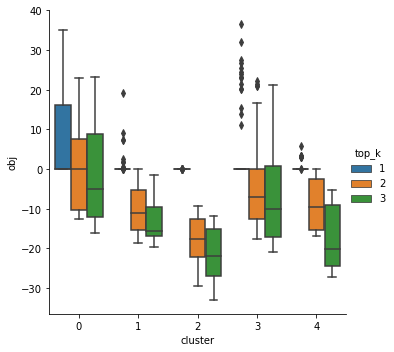

In [19]:
sns.catplot('cluster', 'obj', 'top_k', data=df_plot, kind='box')

In [118]:
extstate = 0

def custom_plot(x, y, **kwargs):
    offsets = np.linspace(-0.3, .3, 6)
    l = kwargs['label']
    if '20p' in l : offset = offsets[1]
    elif '50p' in l : offset = offsets[2]
    elif '70p' in l : offset = offsets[3]
    elif '18_18' in l : offset = offsets[4]
    elif '30_10' in l : offset = offsets[5]
    elif 'lin' in l : offset = offsets[0]
    for i in range(0, 5):
        ys = y.iloc[i::5]
        xs = x.iloc[i::5]
        plt.scatter(xs.iloc[0] + offset, ys.iloc[0], marker='v', **kwargs)
        plt.scatter(xs.iloc[1] + offset, ys.iloc[1], marker='o', **kwargs)
        plt.scatter(xs.iloc[2] + offset, ys.iloc[2], marker='^', **kwargs)
        plt.plot([-0.5, 4.5], [0,0], linestyle='--', alpha=0.7, **kwargs)



In the plot below the violation of top-k-equivalence for k=1,2,3 are shown for the chosen clusters for the comparison of the full network to the compressed networks.

Down-triangles represent a radius of 1/20, circles a radius of 1/10 and up-triangles a radius of 1/5 of the maximal cluster radius. 

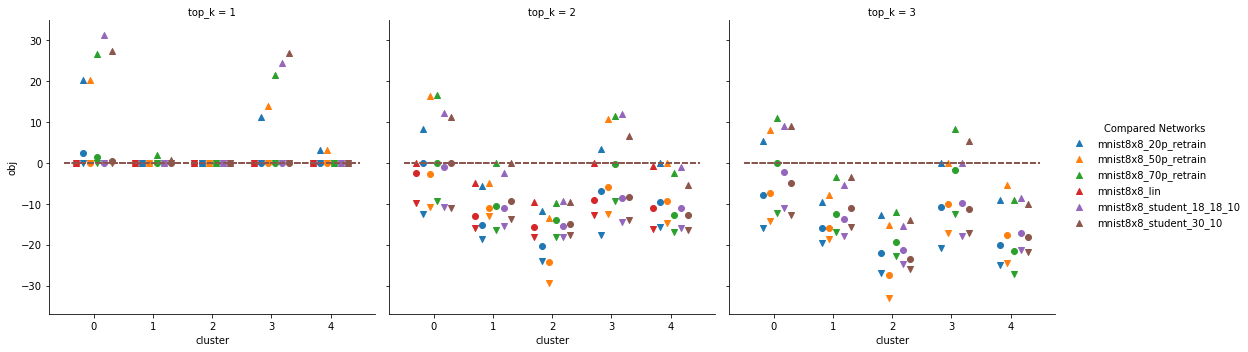

In [121]:
g = sns.FacetGrid(df_plot[(df_plot['nn1'] == 'mnist8x8_lin')], col='top_k', hue='nn2', height=5)
g.map(custom_plot, 'cluster', 'obj')
g._legend_data.update({'step 0.05' : 'v'})
g.add_legend();

g._legend.set_title('Compared Networks')

In [122]:
g.savefig('full_mnist_fixed_radius_vs_nn2.pdf')

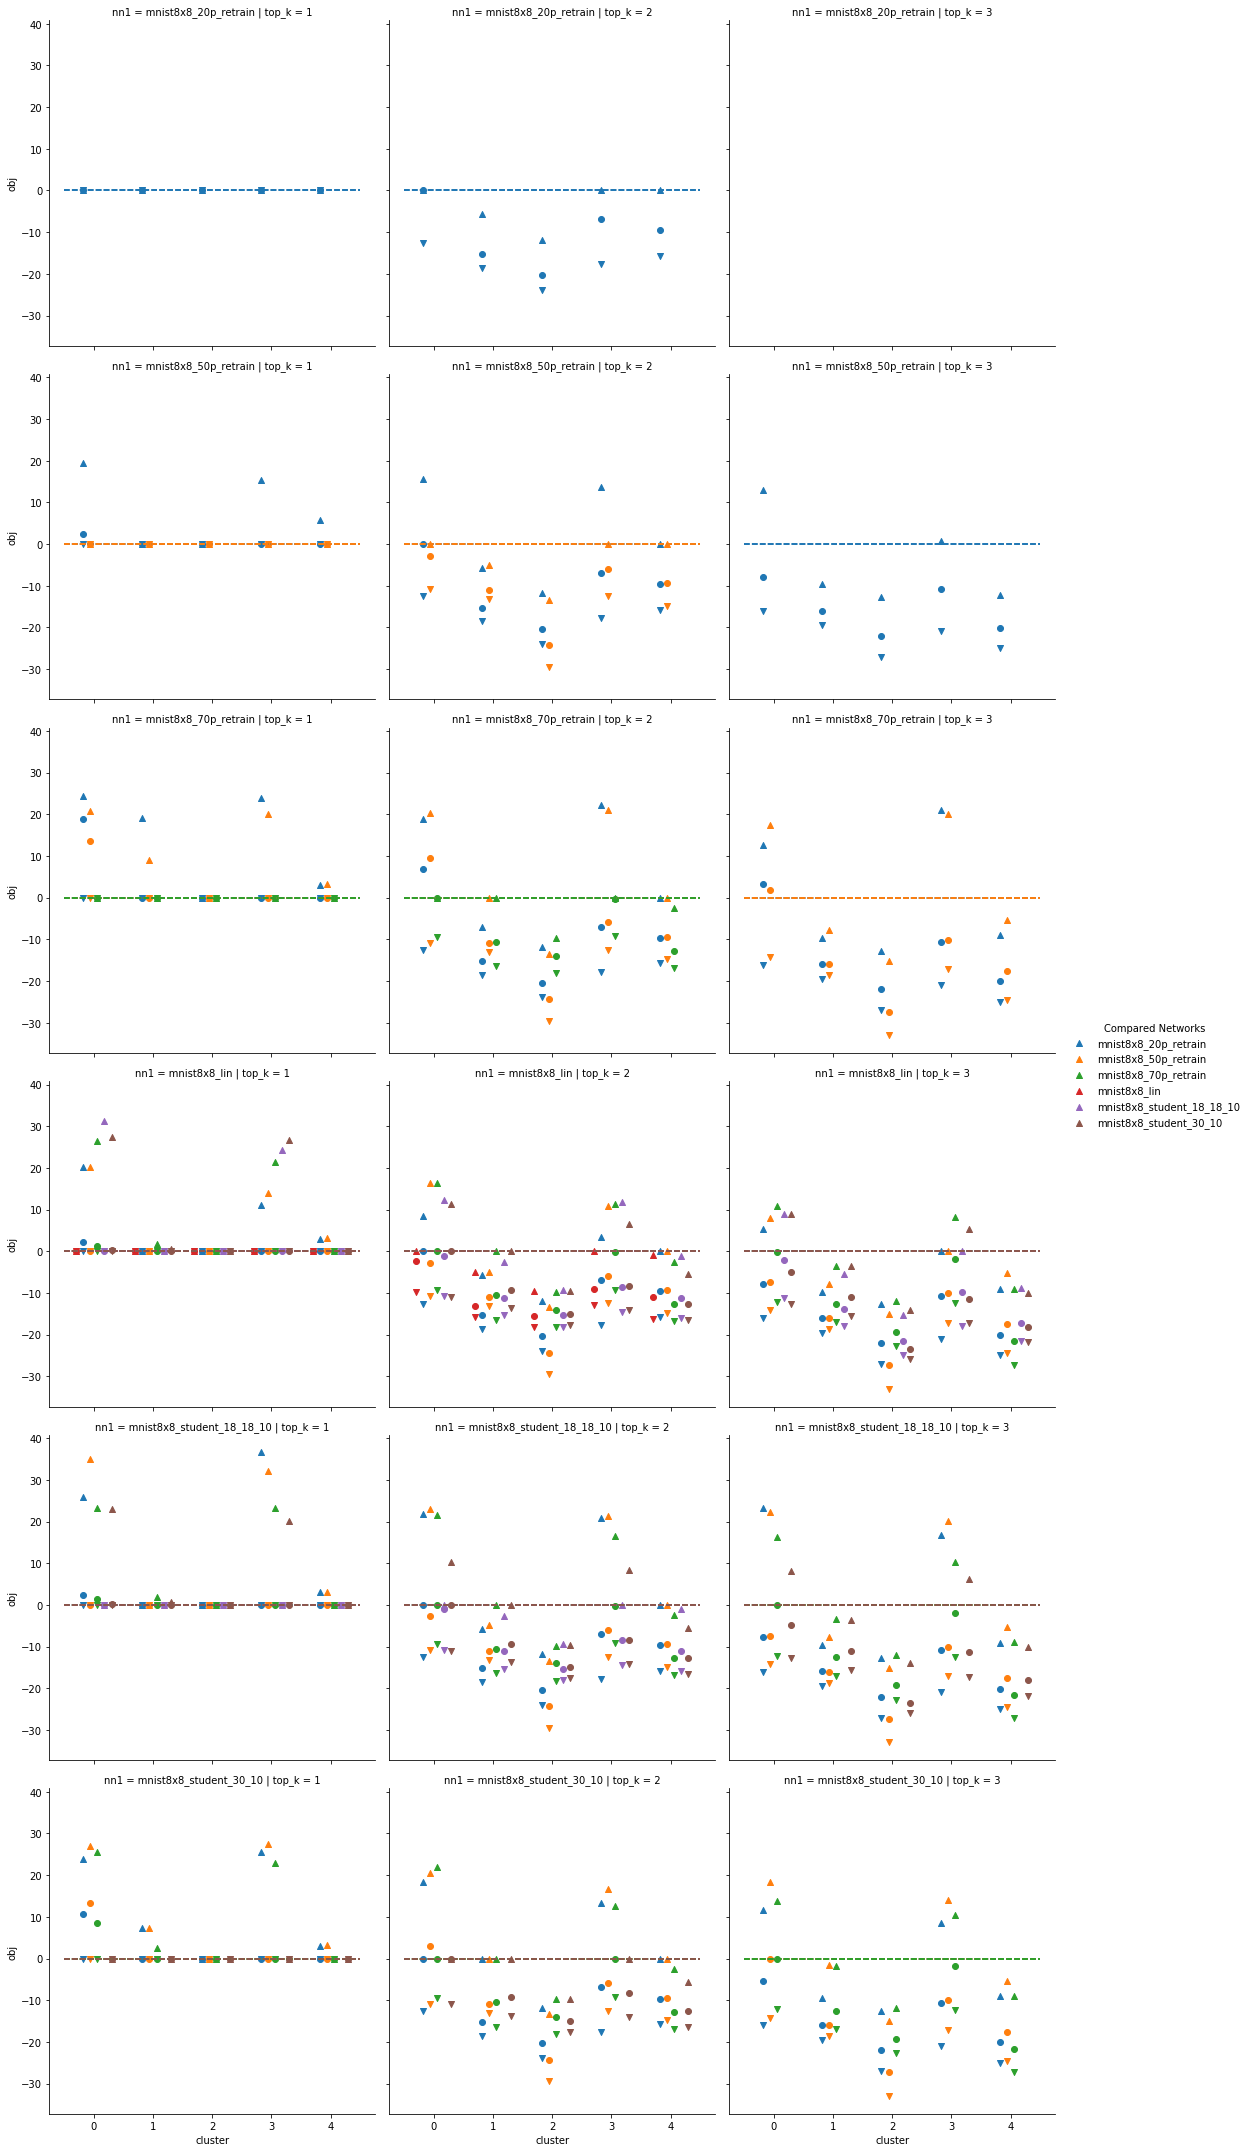

In [123]:
g2 = sns.FacetGrid(df_plot, col='top_k', row='nn1', hue='nn2', height=5)
g2.map(custom_plot, 'cluster', 'obj')
g2._legend_data.update({'step 0.05' : 'v'})
g2.add_legend();

g2._legend.set_title('Compared Networks')

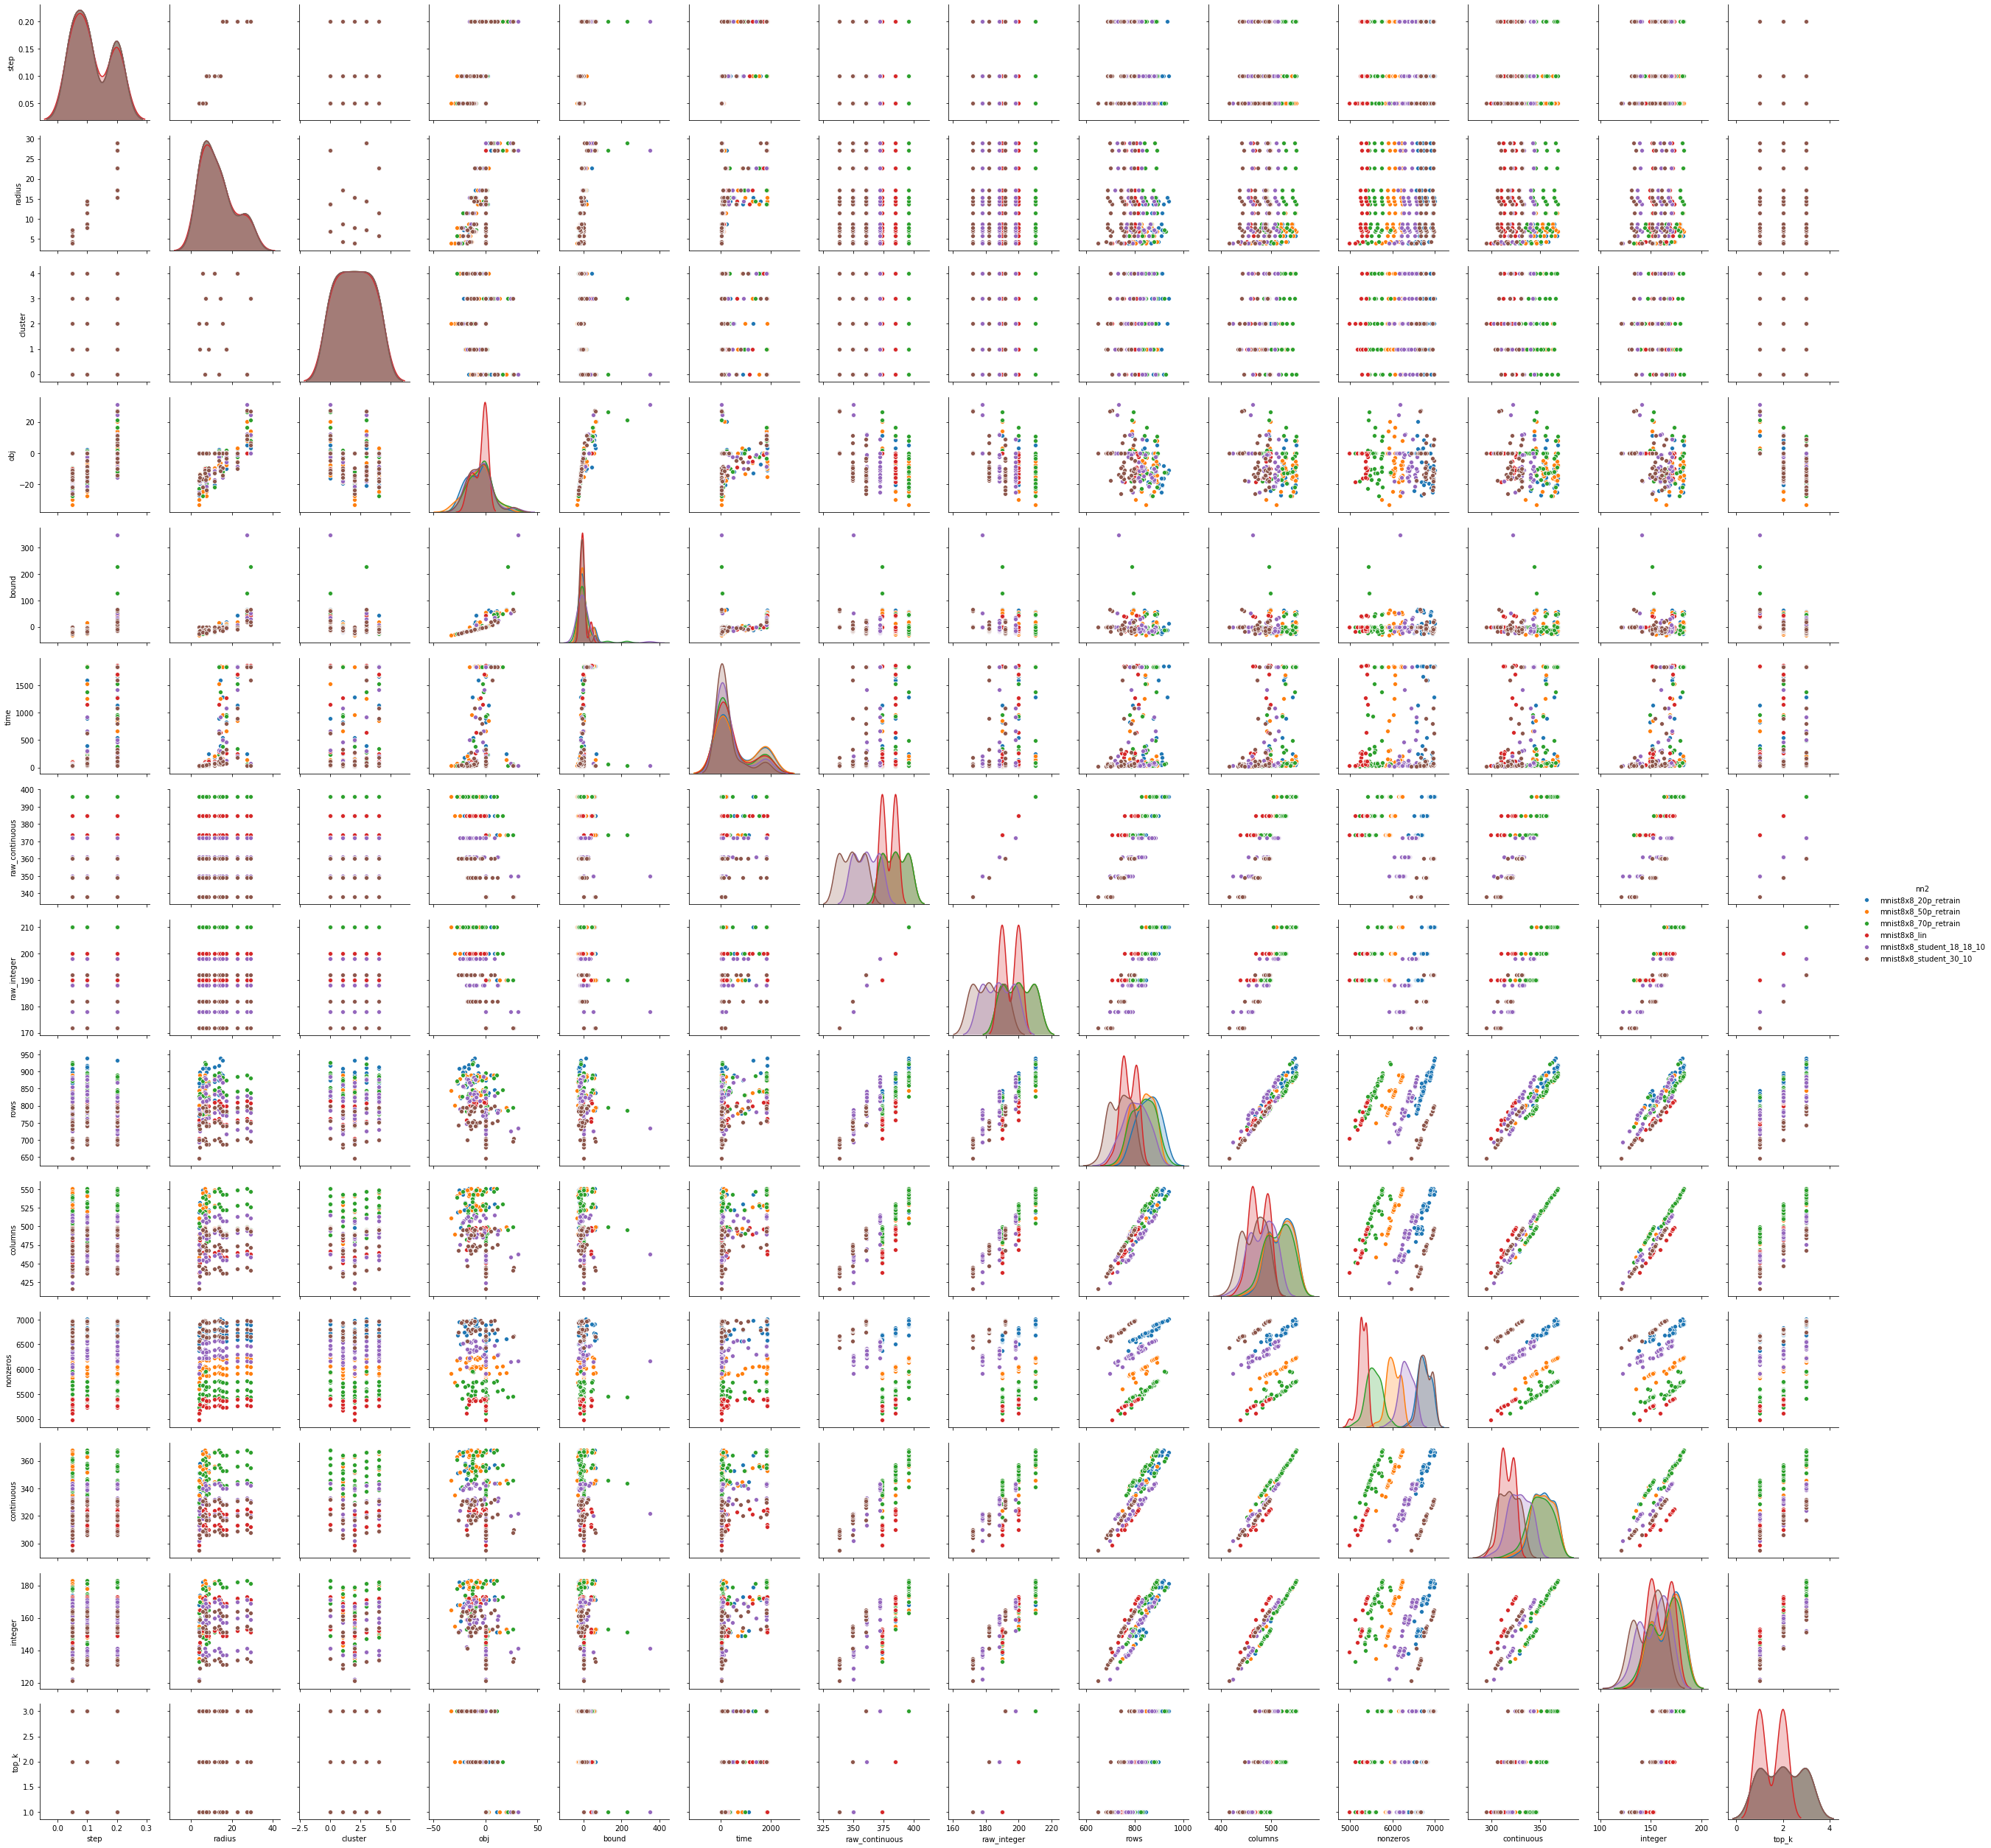

In [10]:
sns.pairplot(df_plot[df_plot['nn1'] == 'mnist8x8_lin'], vars=['step', 'radius', 'cluster', 'obj', 'bound', 'time', 'raw_continuous', 'raw_integer', 
                            'rows', 'columns', 'nonzeros', 'continuous', 'integer', 'top_k'], hue='nn2')

In [52]:
df_plot[(df_plot['nn1'] == 'mnist8x8_lin') & (df_plot['obj'] > 0.1)].drop(['logfile', 'raw_continuous', 
                                                                           'raw_integer', 'rows', 'columns', 
                                                                           'nonzeros', 'continuous', 
                                                                           'integer'], axis=1).sort_values(['cluster', 'step', 'testname'])

testname  cluster  step  radius  \
230  mnist8x8_lin_vs_mnist8x8_20p_retrain_one_hot_p...        0   0.1    13.6   
320  mnist8x8_lin_vs_mnist8x8_70p_retrain_one_hot_p...        0   0.1    13.6   
440  mnist8x8_lin_vs_mnist8x8_student_30_10_one_hot...        0   0.1    13.6   
235  mnist8x8_lin_vs_mnist8x8_20p_retrain_one_hot_p...        0   0.2    27.2   
250  mnist8x8_lin_vs_mnist8x8_20p_retrain_one_hot_p...        0   0.2    27.2   
265  mnist8x8_lin_vs_mnist8x8_20p_retrain_one_hot_p...        0   0.2    27.2   
280  mnist8x8_lin_vs_mnist8x8_50p_retrain_one_hot_p...        0   0.2    27.2   
295  mnist8x8_lin_vs_mnist8x8_50p_retrain_one_hot_p...        0   0.2    27.2   
310  mnist8x8_lin_vs_mnist8x8_50p_retrain_one_hot_p...        0   0.2    27.2   
325  mnist8x8_lin_vs_mnist8x8_70p_retrain_one_hot_p...        0   0.2    27.2   
340  mnist8x8_lin_vs_mnist8x8_70p_retrain_one_hot_p...        0   0.2    27.2   
355  mnist8x8_lin_vs_mnist8x8_70p_retrain_one_hot_p...        0   0.2    27.2   
400  mnist8x8_lin_vs_mnist8x8_student_18_18_10_one_...        0   0.2    27.2   
415  mnist8x8_lin_vs_mnist8x8_student_18_18_10_one_...        0   0.2    27.2   
430  mnist8x8_lin_vs_mnist8x8_student_18_18_10_one_...        0   0.2    27.2   
445  mnist8x8_lin_vs_mnist8x8_student_30_10_one_hot...        0   0.2    27.2   
460  mnist8x8_lin_vs_mnist8x8_student_30_10_one_hot...        0   0.2    27.2   
475  mnist8x8_lin_vs_mnist8x8_student_30_10_one_hot...        0   0.2    27.2   
326  mnist8x8_lin_vs_mnist8x8_70p_retrain_one_hot_p...        1   0.2    17.2   
446  mnist8x8_lin_vs_mnist8x8_student_30_10_one_hot...        1   0.2    17.2   
238  mnist8x8_lin_vs_mnist8x8_20p_retrain_one_hot_p...        3   0.2    29.0   
253  mnist8x8_lin_vs_mnist8x8_20p_retrain_one_hot_p...        3   0.2    29.0   
283  mnist8x8_lin_vs_mnist8x8_50p_retrain_one_hot_p...        3   0.2    29.0   
298  mnist8x8_lin_vs_mnist8x8_50p_retrain_one_hot_p...        3   0.2    29.0   
328  mnist8x8_lin_vs_mnist8x8_70p_retrain_one_hot_p...        3   0.2    29.0   
343  mnist8x8_lin_vs_mnist8x8_70p_retrain_one_hot_p...        3   0.2    29.0   
358  mnist8x8_lin_vs_mnist8x8_70p_retrain_one_hot_p...        3   0.2    29.0   
403  mnist8x8_lin_vs_mnist8x8_student_18_18_10_one_...        3   0.2    29.0   
418  mnist8x8_lin_vs_mnist8x8_student_18_18_10_one_...        3   0.2    29.0   
448  mnist8x8_lin_vs_mnist8x8_student_30_10_one_hot...        3   0.2    29.0   
463  mnist8x8_lin_vs_mnist8x8_student_30_10_one_hot...        3   0.2    29.0   
478  mnist8x8_lin_vs_mnist8x8_student_30_10_one_hot...        3   0.2    29.0   
239  mnist8x8_lin_vs_mnist8x8_20p_retrain_one_hot_p...        4   0.2    22.8   
284  mnist8x8_lin_vs_mnist8x8_50p_retrain_one_hot_p...        4   0.2    22.8   

           obj       bound         time  \
230   2.321458    2.321458   239.331814   
320   1.307836    1.307836   234.379862   
440   0.334445    0.334445    60.653396   
235  20.281209   66.263096   246.116129   
250   8.370293   55.858452  1842.126452   
265   5.364934   58.550058  1843.771208   
280  20.185733   63.489711   145.225200   
295  16.421711   50.215096  1838.133280   
310   7.984195   49.571784  1837.882996   
325  26.539353  127.222506    60.483558   
340  16.502497   49.774384  1832.155225   
355  10.834953   49.843005  1833.353127   
400  31.264736  348.486153    33.501174   
415  12.234107   23.522762  1833.112292   
430   9.017300   35.549861  1834.407100   
445  27.389595   60.190987    39.792602   
460  11.289590   17.013410  1832.316406   
475   8.936516   23.382363  1834.765037   
326   1.854578    1.854578   960.466519   
446   0.619016    0.619016    79.835613   
238  11.156077   60.568503  1840.258448   
253   3.349463   62.902153  1841.659448   
283  13.987185   52.381538  1835.623315   
298  10.776953   53.431423  1837.134946   
328  21.367860  229.162349    36.961793   
343  11.422081   40.503138  1831.327181   
358   8.208499   45.884230  1834.369849   
403  2

Examine self-equivalence for all networks, to answer question which compression method is best suited to reduce verification time.

Consider self-equivalence as it removes influence of varying difficulty of equivalence problem between two networks.

In [127]:
df_self = df_plot[df_plot['nn1'] == df_plot['nn2']]

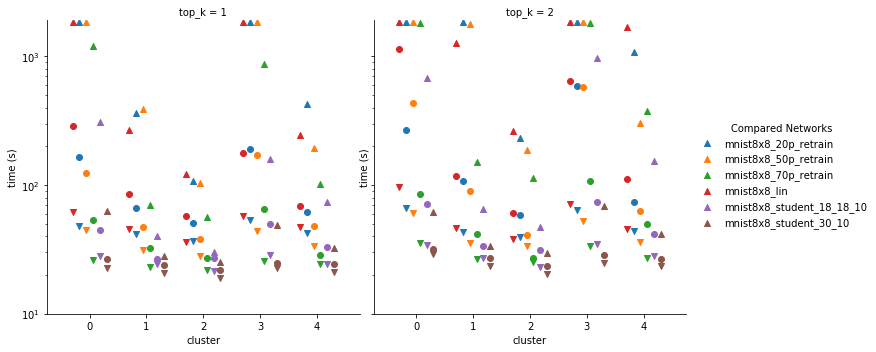

In [230]:
g_self = sns.FacetGrid(df_self, col='top_k', hue='nn2', height=5, ylim=(10, 1900), legend_out = True)
g_self.map(custom_plot, 'cluster', 'time').set(yscale = 'log', ylabel='time (s)')
g_self._legend_data.update({'step 0.05' : 'v'})
g_self.add_legend();

# title
g_self._legend.set_title('Compared Networks')
# replace labels
new_labels = ['label 1', 'label 2']
for t, l in zip(g._legend.texts, ['20%', '50%', '70%', 'full', '18-18-10', '30-10']): t.set_text(l)



In [231]:
g_self.savefig('cluster_self_equivalence.pdf', bbox_inches='tight')

In [138]:
df_70vs181810 = df_self[(df_self['nn1'] == 'mnist8x8_70p_retrain') | (df_self['nn1'] == 'mnist8x8_student_18_18_10')].sort_values(['nn1','top_k','cluster','step'])
df_70vs181810[['nn1', 'nn2', 'top_k', 'cluster', 'step', 'radius', 'time', 'integer', 'continuous', 'rows', 'columns', 'nonzeros']]

nn1                        nn2  top_k  cluster  \
195       mnist8x8_70p_retrain       mnist8x8_70p_retrain      1        0   
200       mnist8x8_70p_retrain       mnist8x8_70p_retrain      1        0   
205       mnist8x8_70p_retrain       mnist8x8_70p_retrain      1        0   
196       mnist8x8_70p_retrain       mnist8x8_70p_retrain      1        1   
201       mnist8x8_70p_retrain       mnist8x8_70p_retrain      1        1   
206       mnist8x8_70p_retrain       mnist8x8_70p_retrain      1        1   
197       mnist8x8_70p_retrain       mnist8x8_70p_retrain      1        2   
202       mnist8x8_70p_retrain       mnist8x8_70p_retrain      1        2   
207       mnist8x8_70p_retrain       mnist8x8_70p_retrain      1        2   
198       mnist8x8_70p_retrain       mnist8x8_70p_retrain      1        3   
203       mnist8x8_70p_retrain       mnist8x8_70p_retrain      1        3   
208       mnist8x8_70p_retrain       mnist8x8_70p_retrain      1        3   
199       mnist8x8_70p_retrain       mnist8x8_70p_retrain      1        4   
204       mnist8x8_70p_retrain       mnist8x8_70p_retrain      1        4   
209       mnist8x8_70p_retrain       mnist8x8_70p_retrain      1        4   
210       mnist8x8_70p_retrain       mnist8x8_70p_retrain      2        0   
215       mnist8x8_70p_retrain       mnist8x8_70p_retrain      2        0   
220       mnist8x8_70p_retrain       mnist8x8_70p_retrain      2        0   
211       mnist8x8_70p_retrain       mnist8x8_70p_retrain      2        1   
216       mnist8x8_70p_retrain       mnist8x8_70p_retrain      2        1   
221       mnist8x8_70p_retrain       mnist8x8_70p_retrain      2        1   
212       mnist8x8_70p_retrain       mnist8x8_70p_retrain      2        2   
217       mnist8x8_70p_retrain       mnist8x8_70p_retrain      2        2   
222       mnist8x8_70p_retrain       mnist8x8_70p_retrain      2        2   
213       mnist8x8_70p_retrain       mnist8x8_70p_retrain      2        3   
218       mnist8x8_70p_retrain       mnist8x8_70p_retrain      2        3   
223       mnist8x8_70p_retrain       mnist8x8_70p_retrain      2        3   
214       mnist8x8_70p_retrain       mnist8x8_70p_retrain      2        4   
219       mnist8x8_70p_retrain       mnist8x8_70p_retrain      2        4   
224       mnist8x8_70p_retrain       mnist8x8_70p_retrain      2        4   
615  mnist8x8_student_18_18_10  mnist8x8_student_18_18_10      1        0   
620  mnist8x8_student_18_18_10  mnist8x8_student_18_18_10      1        0   
625  mnist8x8_student_18_18_10  mnist8x8_student_18_18_10      1        0   
616  mnist8x8_student_18_18_10  mnist8x8_student_18_18_10      1        1   
621  mnist8x8_student_18_18_10  mnist8x8_student_18_18_10      1        1   
626  mnist8x8_student_18_18_10  mnist8x8_student_18_18_10      1        1   
617  mnist8x8_student_18_18_10  mnist8x8_student_18_18_10      1        2   
622  mnist8x8_student_18_18_10  mnist8x8_student_18_18_10      1        2   
627  mnist8x8_student_18_18_10  mnist8x8_student_18_18_10      1        2   
618  mnist8x8_student_18_18_10  mnist8x8_student_18_18_10      1        3   
623  mnist8x8_student_18_18_10  mnist8x8_student_18_18_10      1        3   
628  mnist8x8_student_18_18_10  mnist8x8_student_18_18_10      1        3   
619  mnist8x8_student_18_18_10  mnist8x8_student_18_18_10      1        4   
624  mnist8x8_student_18_18_10  mnist8x8_student_18_18_10      1        4   
629  mnist8x8_student_18_18_10  mnist8x8_student_18_18_10      1        4   
630  mnist8x8_student_18_18_10  mnist8x8_student_18_18_10      2        0   
635  mnist8x8_student_18_18_10  mnist8x8_student_18_18_10      2        0   
640  mnist8x8_student_18_18_10  mnist8x8_student_18_18_10      2        0   
631  mnist8x8_student_18_18_10  mnist8x8_student_18_18_10      2        1   
636  mnist8x8_student_18_18_10  mnist8x8_student_18_18_10      2        1   
641  mnist8x8_student_18_18_10  mnist8x8_student_18_18_10      2        1   
632  mnist8x8_student_1

# No Input Restrictions Evaluation #

In [139]:
df_no_clusters = pickle.load(open('../FinalEvaluation/NoClusters/df_no_clusters.pickle', 'rb'))
df_no_clusters.head()

testname         obj       bound  \
0  mnist8x8_lin_vs_mnist8x8_student_18_18_10_one_...   42.335287  489.394041   
1  mnist8x8_lin_vs_mnist8x8_student_30_10_one_hot...   49.984931  268.992788   
2  mnist8x8_lin_vs_mnist8x8_70p_retrain_one_hot_p...  113.897682  530.303355   
3  mnist8x8_lin_vs_mnist8x8_50p_retrain_one_hot_p...   29.613559  570.157880   
4  mnist8x8_lin_vs_mnist8x8_20p_retrain_one_hot_p...   42.809950  654.970037   

        time                                            logfile  \
0  45.976552  FinalEvaluation/mnist8x8_lin_vs_mnist8x8_stude...   
1  51.774938  FinalEvaluation/mnist8x8_lin_vs_mnist8x8_stude...   
2  45.602947  FinalEvaluation/mnist8x8_lin_vs_mnist8x8_70p_r...   
3  45.314642  FinalEvaluation/mnist8x8_lin_vs_mnist8x8_50p_r...   
4  57.427657  FinalEvaluation/mnist8x8_lin_vs_mnist8x8_20p_r...   

                                           inputfile  \
0  FinalEvaluation/mnist8x8_lin_vs_mnist8x8_stude...   
1  FinalEvaluation/mnist8x8_lin_vs_mnist8x8_stude...   
2  FinalEvaluation/mnist8x8_lin_vs_mnist8x8_70p_r...   
3  FinalEvaluation/mnist8x8_lin_vs_mnist8x8_50p_r...   
4  FinalEvaluation/mnist8x8_lin_vs_mnist8x8_20p_r...   

                                          model_name  BoundVio  BoundVioIndex  \
0  mnist8x8_lin_vs_mnist8x8_student_18_18_10_one_...       0.0             -1   
1  mnist8x8_lin_vs_mnist8x8_student_30_10_one_hot...       0.0             -1   
2  mnist8x8_lin_vs_mnist8x8_70p_retrain_one_hot_p...       0.0             -1   
3  mnist8x8_lin_vs_mnist8x8_50p_retrain_one_hot_p...       0.0             -1   
4  mnist8x8_lin_vs_mnist8x8_20p_retrain_one_hot_p...       0.0             -1   

      ConstrVio  ConstrVioIndex  ConstrVioSum  IntVio  IntVioIndex  IntVioSum  \
0  1.421085e-14             107  2.004924e-13     0.0           -1        0.0   
1  3.552714e-14              14  3.664430e-13     0.0           -1        0.0   
2  3.197442e-14              39  4.281853e-13     0.0           -1        0.0   
3  7.438494e-15               0  1.552647e-13     0.0           -1        0.0   
4  4.618528e-14               6  3.704398e-13     0.0           -1        0.0   

      MaxBound  MaxCoeff  MaxRHS  MinBound  MinCoeff  
0  3172.448875  1.000000     1.0       1.0   0.00010  
1  2021.665633  1.000000     1.0       1.0   0.00001  
2  3570.302149  1.243010     1.0       1.0   0.00010  
3  4621.933556  1.044320     1.0       1.0   0.00010  
4  5180.837641  1.005478     1.0       1.0   0.00010

In [140]:
df_no_clusters['inputfile'] = 'FinalEvaluation/NoClusters/inputs/' + df_no_clusters['inputfile'].astype(str)
df_no_clusters['logfile'] = df_no_clusters['logfile'].str.replace('FinalEvaluation', 'FinalEvaluation/NoClusters/logs')
df_no_clusters.head()

testname         obj       bound  \
0  mnist8x8_lin_vs_mnist8x8_student_18_18_10_one_...   42.335287  489.394041   
1  mnist8x8_lin_vs_mnist8x8_student_30_10_one_hot...   49.984931  268.992788   
2  mnist8x8_lin_vs_mnist8x8_70p_retrain_one_hot_p...  113.897682  530.303355   
3  mnist8x8_lin_vs_mnist8x8_50p_retrain_one_hot_p...   29.613559  570.157880   
4  mnist8x8_lin_vs_mnist8x8_20p_retrain_one_hot_p...   42.809950  654.970037   

        time                                            logfile  \
0  45.976552  FinalEvaluation/NoClusters/logs/mnist8x8_lin_v...   
1  51.774938  FinalEvaluation/NoClusters/logs/mnist8x8_lin_v...   
2  45.602947  FinalEvaluation/NoClusters/logs/mnist8x8_lin_v...   
3  45.314642  FinalEvaluation/NoClusters/logs/mnist8x8_lin_v...   
4  57.427657  FinalEvaluation/NoClusters/logs/mnist8x8_lin_v...   

                                           inputfile  \
0  FinalEvaluation/NoClusters/inputs/FinalEvaluat...   
1  FinalEvaluation/NoClusters/inputs/FinalEvaluat...   
2  FinalEvaluation/NoClusters/inputs/FinalEvaluat...   
3  FinalEvaluation/NoClusters/inputs/FinalEvaluat...   
4  FinalEvaluation/NoClusters/inputs/FinalEvaluat...   

                                          model_name  BoundVio  BoundVioIndex  \
0  mnist8x8_lin_vs_mnist8x8_student_18_18_10_one_...       0.0             -1   
1  mnist8x8_lin_vs_mnist8x8_student_30_10_one_hot...       0.0             -1   
2  mnist8x8_lin_vs_mnist8x8_70p_retrain_one_hot_p...       0.0             -1   
3  mnist8x8_lin_vs_mnist8x8_50p_retrain_one_hot_p...       0.0             -1   
4  mnist8x8_lin_vs_mnist8x8_20p_retrain_one_hot_p...       0.0             -1   

      ConstrVio  ConstrVioIndex  ConstrVioSum  IntVio  IntVioIndex  IntVioSum  \
0  1.421085e-14             107  2.004924e-13     0.0           -1        0.0   
1  3.552714e-14              14  3.664430e-13     0.0           -1        0.0   
2  3.197442e-14              39  4.281853e-13     0.0           -1        0.0   
3  7.438494e-15               0  1.552647e-13     0.0           -1        0.0   
4  4.618528e-14               6  3.704398e-13     0.0           -1        0.0   

      MaxBound  MaxCoeff  MaxRHS  MinBound  MinCoeff  
0  3172.448875  1.000000     1.0       1.0   0.00010  
1  2021.665633  1.000000     1.0       1.0   0.00001  
2  3570.302149  1.243010     1.0       1.0   0.00010  
3  4621.933556  1.044320     1.0       1.0   0.00010  
4  5180.837641  1.005478     1.0       1.0   0.00010

In [141]:
dict_list = df_no_clusters.to_dict('records')

for d in dict_list:
    d = update_dict_from_log(d, logfile='../' + d['logfile'])
    d = update_dict_split_testname(d)
    
df_no_clusters = pd.DataFrame(dict_list)
df_no_clusters.head()

testname         obj       bound  \
0  mnist8x8_lin_vs_mnist8x8_student_18_18_10_one_...   42.335287  489.394041   
1  mnist8x8_lin_vs_mnist8x8_student_30_10_one_hot...   49.984931  268.992788   
2  mnist8x8_lin_vs_mnist8x8_70p_retrain_one_hot_p...  113.897682  530.303355   
3  mnist8x8_lin_vs_mnist8x8_50p_retrain_one_hot_p...   29.613559  570.157880   
4  mnist8x8_lin_vs_mnist8x8_20p_retrain_one_hot_p...   42.809950  654.970037   

        time                                            logfile  \
0  45.976552  FinalEvaluation/NoClusters/logs/mnist8x8_lin_v...   
1  51.774938  FinalEvaluation/NoClusters/logs/mnist8x8_lin_v...   
2  45.602947  FinalEvaluation/NoClusters/logs/mnist8x8_lin_v...   
3  45.314642  FinalEvaluation/NoClusters/logs/mnist8x8_lin_v...   
4  57.427657  FinalEvaluation/NoClusters/logs/mnist8x8_lin_v...   

                                           inputfile  \
0  FinalEvaluation/NoClusters/inputs/FinalEvaluat...   
1  FinalEvaluation/NoClusters/inputs/FinalEvaluat...   
2  FinalEvaluation/NoClusters/inputs/FinalEvaluat...   
3  FinalEvaluation/NoClusters/inputs/FinalEvaluat...   
4  FinalEvaluation/NoClusters/inputs/FinalEvaluat...   

                                          model_name  BoundVio  BoundVioIndex  \
0  mnist8x8_lin_vs_mnist8x8_student_18_18_10_one_...       0.0             -1   
1  mnist8x8_lin_vs_mnist8x8_student_30_10_one_hot...       0.0             -1   
2  mnist8x8_lin_vs_mnist8x8_70p_retrain_one_hot_p...       0.0             -1   
3  mnist8x8_lin_vs_mnist8x8_50p_retrain_one_hot_p...       0.0             -1   
4  mnist8x8_lin_vs_mnist8x8_20p_retrain_one_hot_p...       0.0             -1   

      ConstrVio  ...  rows  columns  nonzeros  continuous  integer  binary  \
0  1.421085e-14  ...   416      388      5382         284      104     104   
1  3.552714e-14  ...   398      370      5910         272       98      98   
2  3.197442e-14  ...   450      422      4619         307      115     115   
3  7.438494e-15  ...   452      424      5098         308      116     116   
4  4.618528e-14  ...   452      424      5769         308      116     116   

   grbTime           nn1                        nn2  top_k  
0     1.42  mnist8x8_lin  mnist8x8_student_18_18_10      1  
1     1.65  mnist8x8_lin     mnist8x8_student_30_10      1  
2     0.51  mnist8x8_lin       mnist8x8_70p_retrain      1  
3     1.58  mnist8x8_lin       mnist8x8_50p_retrain      1  
4     1.61  mnist8x8_lin       mnist8x8_20p_retrain      1  

[5 rows x 33 columns]

In [142]:
df_no_clusters.describe()

obj       bound       time  BoundVio  BoundVioIndex  \
count   45.000000   45.000000  45.000000      45.0           45.0   
mean    61.055441  526.876526  33.586319       0.0           -1.0   
std     35.393896  117.657854  11.912261       0.0            0.0   
min     20.143770  261.967601  15.877593       0.0           -1.0   
25%     37.068446  505.065175  23.312113       0.0           -1.0   
50%     46.763706  568.175744  33.862141       0.0           -1.0   
75%     85.872616  603.322544  40.165741       0.0           -1.0   
max    186.194796  655.513239  57.427657       0.0           -1.0   

          ConstrVio  ConstrVioIndex  ConstrVioSum  IntVio  IntVioIndex  ...  \
count  4.500000e+01       45.000000  4.500000e+01    45.0         45.0  ...   
mean   5.319757e-14       63.244444  4.111617e-13     0.0         -1.0  ...   
std    7.157032e-14       39.916478  2.431881e-13     0.0          0.0  ...   
min    7.438494e-15        0.000000  1.552647e-13     0.0         -1.0  ...   
25%    1.820766e-14       28.000000  2.510769e-13     0.0         -1.0  ...   
50%    2.842171e-14       70.000000  3.407274e-13     0.0         -1.0  ...   
75%    4.618528e-14       96.000000  4.281853e-13     0.0         -1.0  ...   
max    3.090861e-13      130.000000  1.155742e-12     0.0         -1.0  ...   

       raw_integer  raw_binary        rows     columns     nonzeros  \
count    45.000000   45.000000   45.000000   45.000000    45.000000   
mean    126.000000  126.000000  470.333333  420.333333  4766.155556   
std      12.446248   12.446248   48.042122   34.828802   774.506704   
min      96.000000   96.000000  362.000000  334.000000  3253.000000   
25%     118.000000  118.000000  450.000000  398.000000  4181.000000   
50%     126.000000  126.000000  468.000000  421.000000  4799.000000   
75%     136.000000  136.000000  504.000000  452.000000  5366.000000   
max     146.000000  146.000000  547.000000  475.000000  6159.000000   

       continuous     integer      binary    grbTime      top_k  
count   45.000000   45.000000   45.000000  45.000000  45.000000  
mean   298.000000  122.333333  122.333333   0.968222   2.000000  
std     20.418352   15.598660   15.598660   0.670106   0.825723  
min    248.000000   86.000000   86.000000   0.110000   1.000000  
25%    283.000000  115.000000  115.000000   0.410000   1.000000  
50%    294.000000  124.000000  124.000000   0.830000   2.000000  
75%    317.000000  135.000000  135.000000   1.580000   3.000000  
max    329.000000  146.000000  146.000000   2.340000   3.000000  

[8 rows x 27 columns]

# Variables Radius Evaluation #

First create summary dataframe.

In [232]:
import os

In [275]:
dfs = []
for root, _, files in os.walk('../FinalEvaluation/VariableRadius/dataframes'):
    for f in files:
        # don't include previous summary
        if not f == 'df_variable_radius.pickle':
            dfs.append(pickle.load(open(root + '/' + f, 'rb')))
    
df_radius = pd.concat(dfs, ignore_index=True)

In [276]:
df_radius.describe()

cluster         obj       bound         time      BoundVio  \
count  200.000000  200.000000  200.000000   200.000000  2.000000e+02   
mean     2.000000   22.363627   20.832483   594.528762  1.215678e-09   
std      1.417762    6.318266    5.659052   675.348543  1.212923e-08   
min      0.000000   12.531471   12.531471    21.352436  0.000000e+00   
25%      1.000000   16.195767   15.705513   106.228527  0.000000e+00   
50%      2.000000   21.086614   20.547319   239.641434  0.000000e+00   
75%      3.000000   28.284788   25.775668   902.645888  0.000000e+00   
max      4.000000   38.051657   35.041855  1845.762220  1.242759e-07   

       BoundVioIndex     ConstrVio  ConstrVioIndex  ConstrVioSum  \
count     200.000000  2.000000e+02       200.00000  2.000000e+02   
mean        0.680000  3.974207e-09       697.47000  4.021814e-09   
std        16.757736  3.235894e-08       232.03476  3.270949e-08   
min        -1.000000  3.552714e-15        60.00000  3.884913e-14   
25%        -1.000000  2.042810e-14       505.25000  1.898564e-13   
50%        -1.000000  2.842171e-14       783.50000  5.180257e-13   
75%        -1.000000  3.669070e-14       894.75000  6.090727e-13   
max       167.000000  3.057545e-07      1071.00000  3.057546e-07   

             IntVio  IntVioIndex     IntVioSum     MaxBound    MaxCoeff  \
count  2.000000e+02   200.000000  2.000000e+02   200.000000  200.000000   
mean   4.974030e-12     0.815000  4.974030e-12   799.291445  576.087032   
std    7.034341e-11    25.667976  7.034341e-11   252.386417   66.731277   
min    0.000000e+00    -1.000000  0.000000e+00   278.801092  405.305880   
25%    0.000000e+00    -1.000000  0.000000e+00   570.157880  561.771338   
50%    0.000000e+00    -1.000000  0.000000e+00  1024.000000  597.981444   
75%    0.000000e+00    -1.000000  0.000000e+00  1024.000000  644.634373   
max    9.948060e-10   362.000000  9.948060e-10  1024.000000  644.634373   

           MaxRHS      MinBound    MinCoeff  
count  200.000000  2.000000e+02  200.000000  
mean   576.087032  1.000000e-02    0.006110  
std     66.731277  1.739077e-18    0.016566  
min    405.305880  1.000000e-02    0.000010  
25%    561.771338  1.000000e-02    0.000010  
50%    597.981444  1.000000e-02    0.000100  
75%    644.634373  1.000000e-02    0.000180  
max    644.634373  1.000000e-02    0.070236

In [277]:
df_radius['inputfile'] = 'FinalEvaluation/VariableRadius/inputs/' + df_radius['inputfile'].astype(str)
df_radius['logfile'] = df_radius['logfile'].str.replace('FinalEvaluation', 'FinalEvaluation/VariableRadius/logs')
df_radius.head()

testname  cluster        obj  \
0  mnist8x8_50p_retrain_vs_mnist8x8_20p_retrain_o...        0  12.531471   
1  mnist8x8_50p_retrain_vs_mnist8x8_20p_retrain_o...        1  23.726013   
2  mnist8x8_50p_retrain_vs_mnist8x8_20p_retrain_o...        2  25.775668   
3  mnist8x8_50p_retrain_vs_mnist8x8_20p_retrain_o...        3  19.286696   
4  mnist8x8_50p_retrain_vs_mnist8x8_20p_retrain_o...        4  20.100967   

       bound        time                                            logfile  \
0  12.531471   64.182442  FinalEvaluation/VariableRadius/logs/mnist8x8_5...   
1  23.723664  845.943828  FinalEvaluation/VariableRadius/logs/mnist8x8_5...   
2  25.775668  174.572300  FinalEvaluation/VariableRadius/logs/mnist8x8_5...   
3  19.286696  150.900964  FinalEvaluation/VariableRadius/logs/mnist8x8_5...   
4  20.100967  125.740219  FinalEvaluation/VariableRadius/logs/mnist8x8_5...   

                                           inputfile  \
0  FinalEvaluation/VariableRadius/inputs/mnist8x8...   
1  FinalEvaluation/VariableRadius/inputs/mnist8x8...   
2  FinalEvaluation/VariableRadius/inputs/mnist8x8...   
3  FinalEvaluation/VariableRadius/inputs/mnist8x8...   
4  FinalEvaluation/VariableRadius/inputs/mnist8x8...   

                     model_name  BoundVio  BoundVioIndex  ...  ConstrVioIndex  \
0  NN_model_02_01_2020_14_28_06       0.0             -1  ...             942   
1  NN_model_02_01_2020_14_29_10       0.0             -1  ...             936   
2  NN_model_02_01_2020_14_43_17       0.0             -1  ...             506   
3  NN_model_02_01_2020_14_46_10       0.0             -1  ...             907   
4  NN_model_02_01_2020_14_48_42       0.0             -1  ...             945   

   ConstrVioSum  IntVio  IntVioIndex  IntVioSum     MaxBound    MaxCoeff  \
0  1.756373e-13     0.0           -1        0.0   696.120001  644.634373   
1  8.390042e-13     0.0           -1        0.0  1024.000000  644.634373   
2  6.310421e-13     0.0           -1        0.0  1024.000000  644.634373   
3  6.103919e-13     0.0           -1        0.0   696.120001  644.634373   
4  8.750778e-13     0.0           -1        0.0   696.120001  644.634373   

       MaxRHS  MinBound  MinCoeff  
0  644.634373      0.01  0.025243  
1  644.634373      0.01  0.025243  
2  644.634373      0.01  0.025243  
3  644.634373      0.01  0.025243  
4  644.634373      0.01  0.025243  

[5 rows x 21 columns]

In [263]:
df_summary_var_radius.sort_values('testname')

testname  cluster        obj  \
0    mnist8x8_50p_retrain_vs_mnist8x8_20p_retrain_o...        0  12.531471   
1    mnist8x8_50p_retrain_vs_mnist8x8_20p_retrain_o...        1  23.726013   
2    mnist8x8_50p_retrain_vs_mnist8x8_20p_retrain_o...        2  25.775668   
3    mnist8x8_50p_retrain_vs_mnist8x8_20p_retrain_o...        3  19.286696   
4    mnist8x8_50p_retrain_vs_mnist8x8_20p_retrain_o...        4  20.100967   
..                                                 ...      ...        ...   
198  mnist8x8_student_30_10_vs_mnist8x8_70p_retrain...        3  15.835455   
197  mnist8x8_student_30_10_vs_mnist8x8_70p_retrain...        2  29.092830   
196  mnist8x8_student_30_10_vs_mnist8x8_70p_retrain...        1  20.728155   
195  mnist8x8_student_30_10_vs_mnist8x8_70p_retrain...        0  13.929368   
199  mnist8x8_student_30_10_vs_mnist8x8_70p_retrain...        4  30.065804   

         bound        time                                            logfile  \
0    12.531471   64.182442  FinalEvaluation/mnist8x8_50p_retrain_vs_mnist8...   
1    23.723664  845.943828  FinalEvaluation/mnist8x8_50p_retrain_vs_mnist8...   
2    25.775668  174.572300  FinalEvaluation/mnist8x8_50p_retrain_vs_mnist8...   
3    19.286696  150.900964  FinalEvaluation/mnist8x8_50p_retrain_vs_mnist8...   
4    20.100967  125.740219  FinalEvaluation/mnist8x8_50p_retrain_vs_mnist8...   
..         ...         ...                                                ...   
198  15.835455  107.877338  FinalEvaluation/mnist8x8_student_30_10_vs_mnis...   
197  29.092830  514.655177  FinalEvaluation/mnist8x8_student_30_10_vs_mnis...   
196  20.727750  199.004227  FinalEvaluation/mnist8x8_student_30_10_vs_mnis...   
195  13.929368   91.259074  FinalEvaluation/mnist8x8_student_30_10_vs_mnis...   
199  30.065804  141.692054  FinalEvaluation/mnist8x8_student_30_10_vs_mnis...   

                                             inputfile  \
0    mnist8x8_50p_retrain_vs_mnist8x8_20p_retrain_o...   
1    mnist8x8_50p_retrain_vs_mnist8x8_20p_retrain_o...   
2    mnist8x8_50p_retrain_vs_mnist8x8_20p_retrain_o...   
3    mnist8x8_50p_retrain_vs_mnist8x8_20p_retrain_o...   
4    mnist8x8_50p_retrain_vs_mnist8x8_20p_retrain_o...   
..                                                 ...   
198  mnist8x8_student_30_10_vs_mnist8x8_70p_retrain...   
197  mnist8x8_student_30_10_vs_mnist8x8_70p_retrain...   
196  mnist8x8_student_30_10_vs_mnist8x8_70p_retrain...   
195  mnist8x8_student_30_10_vs_mnist8x8_70p_retrain...   
199  mnist8x8_student_30_10_vs_mnist8x8_70p_retrain...   

                       model_name  BoundVio  BoundVioIndex  ...  \
0    NN_model_02_01_2020_14_28_06       0.0             -1  ...   
1    NN_model_02_01_2020_14_29_10       0.0             -1  ...   
2    NN_model_02_01_2020_14_43_17       0.0             -1  ...   
3    NN_model_02_01_2020_14_46_10       0.0             -1  ...   
4    NN_model_02_01_2020_14_48_42       0.0             -1  ...   
..                            ...       ...            ...  ...   
198  NN_model_03_01_2020_23_37_09       0.0             -1  ...   
197  NN_model_03_01_2020_23_28_34       0.0             -1  ...   
196  NN_model_03_01_2020_23_25_15       0.0             -1  ...   
195  NN_model_03_01_2020_23_23_44       0.0             -1  ...   
199  NN_model_03_01_2020_23_38_56       0.0             -1  ...   

     ConstrVioIndex  ConstrVioSum  IntVio  IntVioIndex  IntVioSum  \
0               942  1.756373e-13     0.0           -1        0.0   
1               936  8.390042e-13     0.0           -1        0.0   
2               506  6.310421e-13     0.0           -1        0.0   
3               907  6.103919e-13     0.0           -1        0.0   
4               945  8.750778e-13     0.0           -1        0.0   
..              ...           ...     ...          ...        ...   
198             784  4.315350e-13     0.0           -1        0.0   
197             939  4.685228e-13     0.0           -1        0.0   
196          

In [278]:
dict_list = df_radius.to_dict('records')

for d in dict_list:
    d = update_dict_from_log(d, logfile='../' + d['logfile'])
    d = update_dict_split_testname(d)
    
df_radius = pd.DataFrame(dict_list)
df_radius.head()

testname  cluster        obj  \
0  mnist8x8_50p_retrain_vs_mnist8x8_20p_retrain_o...        0  12.531471   
1  mnist8x8_50p_retrain_vs_mnist8x8_20p_retrain_o...        1  23.726013   
2  mnist8x8_50p_retrain_vs_mnist8x8_20p_retrain_o...        2  25.775668   
3  mnist8x8_50p_retrain_vs_mnist8x8_20p_retrain_o...        3  19.286696   
4  mnist8x8_50p_retrain_vs_mnist8x8_20p_retrain_o...        4  20.100967   

       bound        time                                            logfile  \
0  12.531471   64.182442  FinalEvaluation/VariableRadius/logs/mnist8x8_5...   
1  23.723664  845.943828  FinalEvaluation/VariableRadius/logs/mnist8x8_5...   
2  25.775668  174.572300  FinalEvaluation/VariableRadius/logs/mnist8x8_5...   
3  19.286696  150.900964  FinalEvaluation/VariableRadius/logs/mnist8x8_5...   
4  20.100967  125.740219  FinalEvaluation/VariableRadius/logs/mnist8x8_5...   

                                           inputfile  \
0  FinalEvaluation/VariableRadius/inputs/mnist8x8...   
1  FinalEvaluation/VariableRadius/inputs/mnist8x8...   
2  FinalEvaluation/VariableRadius/inputs/mnist8x8...   
3  FinalEvaluation/VariableRadius/inputs/mnist8x8...   
4  FinalEvaluation/VariableRadius/inputs/mnist8x8...   

                     model_name  BoundVio  BoundVioIndex  ...  rows  columns  \
0  NN_model_02_01_2020_14_28_06       0.0             -1  ...   795      500   
1  NN_model_02_01_2020_14_29_10       0.0             -1  ...   779      492   
2  NN_model_02_01_2020_14_43_17       0.0             -1  ...   779      492   
3  NN_model_02_01_2020_14_46_10       0.0             -1  ...   787      496   
4  NN_model_02_01_2020_14_48_42       0.0             -1  ...   791      498   

   nonzeros  continuous  integer  binary  grbTime                   nn1  \
0      5300         347      153     153    33.67  mnist8x8_50p_retrain   
1      5260         343      149     149   815.99  mnist8x8_50p_retrain   
2      5260         343      149     149   143.93  mnist8x8_50p_retrain   
3      5280         345      151     151   121.16  mnist8x8_50p_retrain   
4      5290         346      152     152    95.72  mnist8x8_50p_retrain   

                    nn2  top_k  
0  mnist8x8_20p_retrain      1  
1  mnist8x8_20p_retrain      1  
2  mnist8x8_20p_retrain      1  
3  mnist8x8_20p_retrain      1  
4  mnist8x8_20p_retrain      1  

[5 rows x 34 columns]

Now that we have fixed the dataframe, we look at the time distributions.

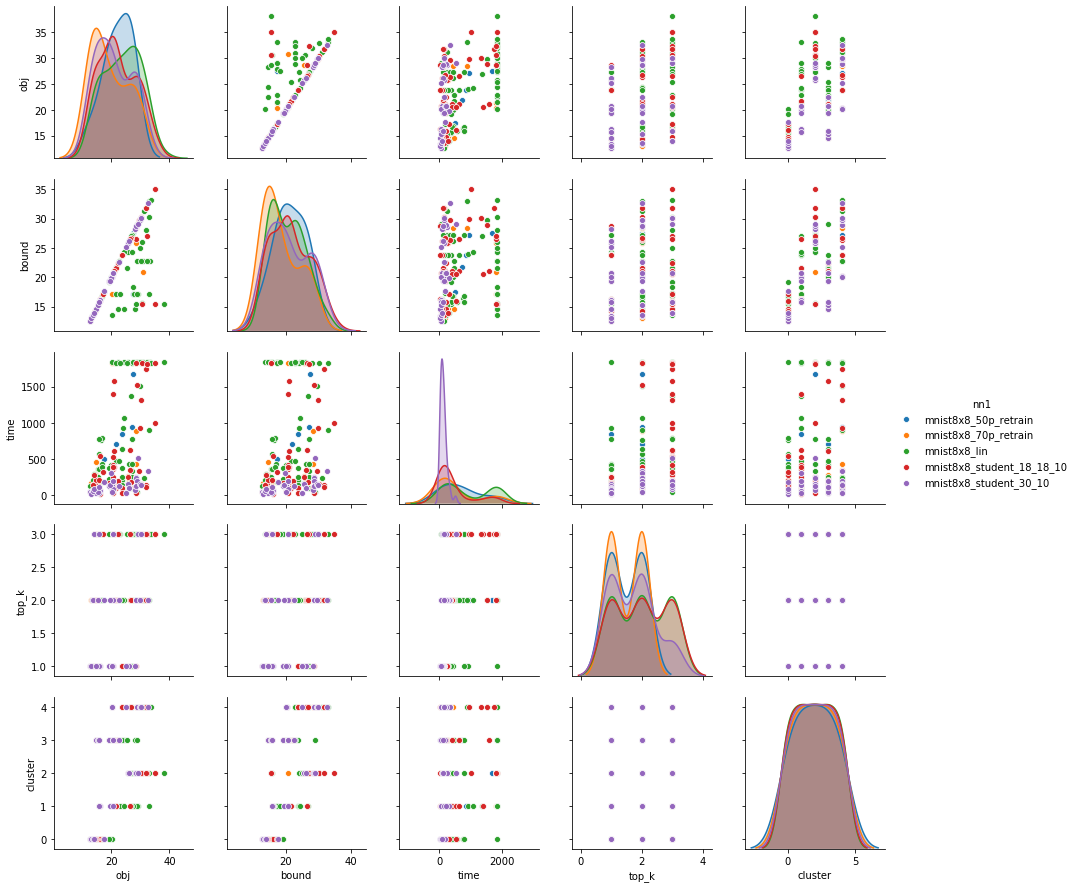

In [283]:
sns.pairplot(df_radius, vars=['obj', 'bound', 'time', 'top_k', 'cluster'], hue='nn1')

For runtime, clusters 0 and 3 perform best with variable radius, which is the exact opposite of the situation with fixed radii.

Perhaps because problems for 0 and 3 were harder in fixed radii and therefore more accurate bounds on equivalence radius were obtained?

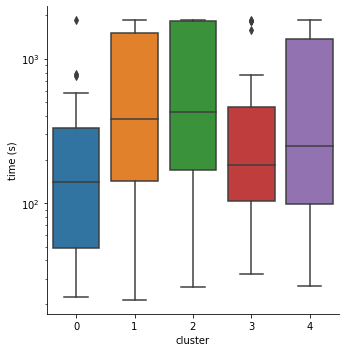

In [286]:
time_cluster = sns.catplot('cluster', 'time', data=df_radius, kind='box').set(yscale='log', ylabel='time (s)')

In [305]:
df_range = df_radius.copy()
df_range['range'] = list(zip(df_radius['obj'].values, df_radius['bound'].values))
df_range.head()

testname  cluster        obj  \
0  mnist8x8_50p_retrain_vs_mnist8x8_20p_retrain_o...        0  12.531471   
1  mnist8x8_50p_retrain_vs_mnist8x8_20p_retrain_o...        1  23.726013   
2  mnist8x8_50p_retrain_vs_mnist8x8_20p_retrain_o...        2  25.775668   
3  mnist8x8_50p_retrain_vs_mnist8x8_20p_retrain_o...        3  19.286696   
4  mnist8x8_50p_retrain_vs_mnist8x8_20p_retrain_o...        4  20.100967   

       bound        time                                            logfile  \
0  12.531471   64.182442  FinalEvaluation/VariableRadius/logs/mnist8x8_5...   
1  23.723664  845.943828  FinalEvaluation/VariableRadius/logs/mnist8x8_5...   
2  25.775668  174.572300  FinalEvaluation/VariableRadius/logs/mnist8x8_5...   
3  19.286696  150.900964  FinalEvaluation/VariableRadius/logs/mnist8x8_5...   
4  20.100967  125.740219  FinalEvaluation/VariableRadius/logs/mnist8x8_5...   

                                           inputfile  \
0  FinalEvaluation/VariableRadius/inputs/mnist8x8...   
1  FinalEvaluation/VariableRadius/inputs/mnist8x8...   
2  FinalEvaluation/VariableRadius/inputs/mnist8x8...   
3  FinalEvaluation/VariableRadius/inputs/mnist8x8...   
4  FinalEvaluation/VariableRadius/inputs/mnist8x8...   

                     model_name  BoundVio  BoundVioIndex  ...  columns  \
0  NN_model_02_01_2020_14_28_06       0.0             -1  ...      500   
1  NN_model_02_01_2020_14_29_10       0.0             -1  ...      492   
2  NN_model_02_01_2020_14_43_17       0.0             -1  ...      492   
3  NN_model_02_01_2020_14_46_10       0.0             -1  ...      496   
4  NN_model_02_01_2020_14_48_42       0.0             -1  ...      498   

   nonzeros  continuous  integer  binary  grbTime                   nn1  \
0      5300         347      153     153    33.67  mnist8x8_50p_retrain   
1      5260         343      149     149   815.99  mnist8x8_50p_retrain   
2      5260         343      149     149   143.93  mnist8x8_50p_retrain   
3      5280         345      151     151   121.16  mnist8x8_50p_retrain   
4      5290         346      152     152    95.72  mnist8x8_50p_retrain   

                    nn2  top_k                             range  
0  mnist8x8_20p_retrain      1  (12.53147136992, 12.53147136992)  
1  mnist8x8_20p_retrain      1  (23.72601289176, 23.72366404911)  
2  mnist8x8_20p_retrain      1  (25.77566788274, 25.77566788274)  
3  mnist8x8_20p_retrain      1  (19.28669633236, 19.28669633236)  
4  mnist8x8_20p_retrain      1  (20.10096699865, 20.10096699865)  

[5 rows x 35 columns]

In [346]:
def cluster_plot(x, y, **kwargs):
    #print('x : ', x)
    #print('y : ', y)
    #print('label : ', kwargs['label'])
    
    offsets = np.linspace(-.2, .2, 5)
    l = kwargs['label']
    offset = offsets[int(l)]
    
    
    for i in range(len(y)):
        obj, bd = y.iloc[i]
        plt.plot([i + offset, i + offset], [obj, bd], **kwargs)
        plt.scatter(i + offset, obj, marker='v', **kwargs)
        plt.scatter(i + offset, bd, marker='^', **kwargs)

In [353]:
def plot_cluster_equivalence(k=1, df=df_range, labels=None, height=5, aspect=2):
    if not labels:
        # is there any better way???
        labels = ['50p_vs_20p','70p_vs_20p','70p_vs_50p','full_vs_20p', 'full_vs_50p', 'full_vs_70p', 'full_vs_18-18-10',
                  'full_vs_30-10','18-18-10_vs_20p', '18-18-10_vs_50p', '18-18-10_vs_70p', '18-18-10_vs_30-10', 
                  '30-10_vs_20p', '30-10_vs_50p', '30-10_vs_70p']
    
    if k < 0:
        g = sns.FacetGrid(df, col='top_k', hue='cluster', height=height, aspect=aspect) 
    else:
        g = sns.FacetGrid(df[df['top_k'] == k], col='top_k', hue='cluster', height=height, aspect=aspect)
    
    g.map(cluster_plot, 'testname', 'range').set(xticklabels=labels, xticks=np.arange(0,len(labels),1), ylabel='radius range', xlabel='')
    #g.map(cluster_plot, 'testname', 'range').set(xticks=df[df['top_k'] == 2]['testname'].drop_duplicates(keep='first').values)
    g.add_legend();
    g.set_xticklabels(rotation=45, horizontalalignment='right')
    
    return g

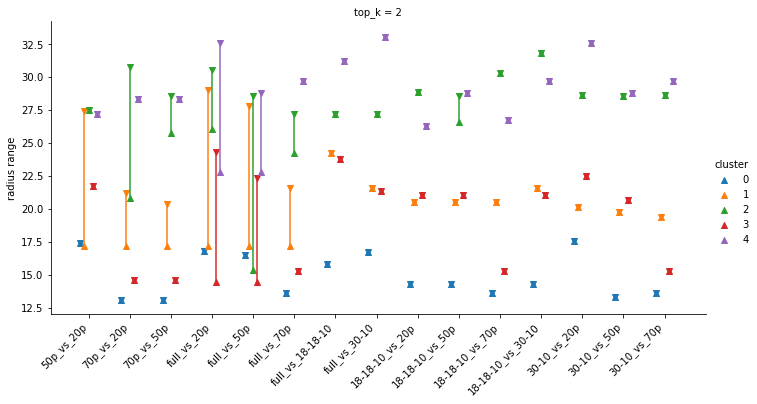

In [370]:
plot_cluster_equivalence(k=2)

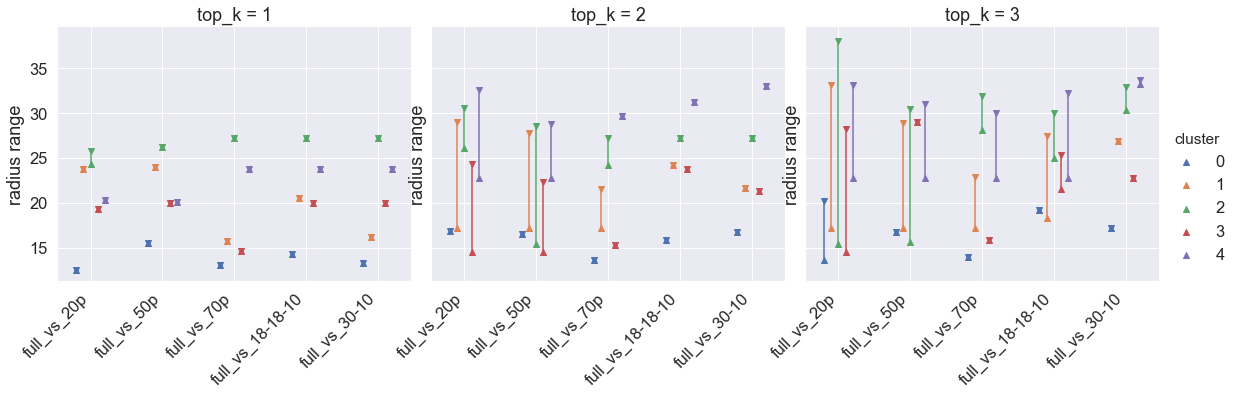

In [384]:
sns.set(font_scale = 1.5)
g_nn_radius = plot_cluster_equivalence(df=df_range[df_range['nn1'] == 'mnist8x8_lin'], labels=['full_vs_20p', 'full_vs_50p', 'full_vs_70p', 'full_vs_18-18-10',
                  'full_vs_30-10'], aspect=1.1, k=-1)

In [385]:
g_nn_radius.savefig('nns_equivalence.pdf', bbox_inches='tight')

In [382]:
df_radius[(df_radius['obj'] - df_radius['bound'] > 0.1) & (df_radius['top_k'] == 1)]

testname  cluster        obj  \
32  mnist8x8_lin_vs_mnist8x8_20p_retrain_one_hot_p...        2  25.775668   

        bound         time                                            logfile  \
32  24.359307  1840.305952  FinalEvaluation/VariableRadius/logs/mnist8x8_l...   

                                            inputfile  \
32  FinalEvaluation/VariableRadius/inputs/mnist8x8...   

                      model_name  BoundVio  BoundVioIndex  ...  rows  columns  \
32  NN_model_02_01_2020_12_44_45       0.0             -1  ...   779      492   

    nonzeros  continuous  integer  binary  grbTime           nn1  \
32      6477         343      149     149   1800.0  mnist8x8_lin   

                     nn2  top_k  
32  mnist8x8_20p_retrain      1  

[1 rows x 34 columns]

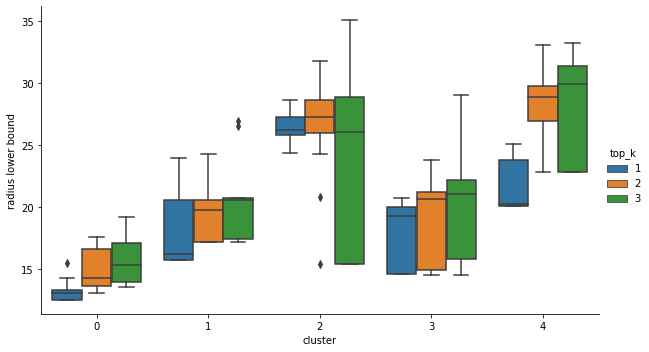

In [373]:
cluster_r = sns.catplot('cluster', 'bound', hue='top_k', data=df_radius, kind='box', height=5, aspect=1.7).set(ylabel='radius lower bound')

In [374]:
cluster_r.savefig('cluster_vs_radius.pdf', bbox_inches='tight')